In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv("./netflix_titles.csv",parse_dates=['date_added'])

In [3]:
#tipo de datos y dimension
print(df.dtypes,df.shape)

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object (7787, 12)


In [4]:
#visualizacion data
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

# EDA

In [5]:
#valores unicos
print(df.nunique(axis=0))

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1512
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


In [6]:
#Cantidad de datos por columnas
df.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

In [7]:
#valores duplicados del dataset
#df.duplicated().sum()
#valores duplicados de una columna especifica
df['description'].duplicated().value_counts()

False    7769
True       18
Name: description, dtype: int64

In [8]:
#lista de duplicados
duplicados_description = df[df['description'].duplicated(keep=False)]['description'].tolist()
duplicados_description

['Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.',
 'After growing up enduring criticism from his father, a young man finds his world shaken upon learning he was switched at birth with a millionaire’s son.',
 'As a woman scours Hyderabad for her missing husband, she becomes entangled in a conspiracy that suggests there’s more to the mystery than meets the eye.',
 'As a blind librarian, dispirited cricketer and desolate psychiatrist each seek retribution and release, their lives overlap under eerie influences.',
 'As a blind librarian, dispirited cricketer and desolate psychiatrist each seek retribution and release, their lives overlap under eerie influences.',
 'After growing up enduring criticism from his father, a young man finds his world shaken upon learning he was switched at birth with a millionaire’s son.',
 'When pretty new neighbor Seema falls for their shy roommate Sid, j

In [9]:
#ubicacion de los valores duplicados
df[df['description'].duplicated()]

show_id     type                                          title  \
510     s511    Movie                                    Andhakaaram   
525     s526    Movie               Angu Vaikuntapurathu (Malayalam)   
1287   s1288    Movie                                Chashme Buddoor   
1377   s1378  TV Show  ChuChu TV Nursery Rhymes & Kids Songs (Hindi)   
1486   s1487    Movie                                  Consequences    
2343   s2344    Movie                      Game Over (Tamil Version)   
4441   s4442    Movie                               Nee Enge En Anbe   
4594   s4595    Movie                           Oh! Baby (Malayalam)   
4595   s4596    Movie                               Oh! Baby (Tamil)   
4839   s4840    Movie                         Petta (Telugu Version)   
5397   s5398    Movie           Sarvam Thaala Mayam (Telugu Version)   
5510   s5511    Movie                                  Seven (Tamil)   
5511   s5512    Movie                                 Seven (Telugu)   
5699   s5700    Movie      Solo: A Star Wars Story (Spanish Version)   
6039   s6040    Movie                              Thackeray (Hindi)   
6487   s6488    Movie                              The Incredibles 2   
6721   s6722  TV Show                          The Ollie & Moon Show   
7129   s7130    Movie                          Together For Eternity   

                 director                                               cast  \
510          V Vignarajan  Vinoth Kishan, Arjun Das, Pooja Ramachandran, ...   
525    Trivikram Srinivas  Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivet...   
1287         David Dhawan  Ali Zafar, Siddharth, Divyendu Sharma, Tapsee ...   
1377                  NaN                                                NaN   
1486         Ozan Açıktan  Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...   
2343     Ashwin Saravanan  Taapsee Pannu, Vinodhini, Parvathi T, Ramya Su...   
4441       Sekhar Kammula  Nayantara, Vaibhav Reddy, Pasupathy, Harshvard...   
4594  B. V. Nandini Reddy  Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...   
4595  B. V. Nandini Reddy  Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...   
4839     Karthik Subbaraj  Rajnikanth, Vijay Sethupathi, M. Sasikumar, Na...   
5397          Rajiv Menon  G.V. Prakash Kumar, Nedumudi Venu, Aparna Bala...   
5510                  NaN                                                NaN   
5511                  NaN                                                NaN   
5699           Ron Howard  Alden Ehrenreich, Woody Harrelson, Emilia Clar...   
6039        Abhijit Panse  Nawazuddin Siddiqui, Amrita Rao, Rajeev Panday...   
6487            Brad Bird  Craig T. Nelson, Holly Hunter, Samuel L. Jacks...   
6721                  NaN                       Mattea Conforti, Kobi Frumer   
7129   Sooraj R. Barjatya  Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...   

            country date_added  release_year rating  duration  \
510           India 2020-11-24          2020  TV-14   171 min   
525             NaN 2020-03-05          2020  TV-14   162 min   
1287          India 2017-05-01          2013  TV-PG   121 min   
1377          India 2020-04-18          2019   TV-Y  1 Season   
1486         Turkey 2019-10-25          2014  TV-MA   106 min   
2343  India, Turkey 2019-08-21          2019  TV-MA    98 min   
4441            NaN 2020-09-17          2014  TV-14   137 min   
4594            NaN 2019-09-25          2019  TV-14   146 min   
4595            NaN 2019-09-25          2019  TV-14   146 min   
4839            NaN 2019-04-07          2019  TV-14   170 min   
5397          India 2019-04-08          2018  TV-14   131 min   
5510          India 2020-06-26          2019  TV-MA   111 min   
5511            NaN 2020-06-26          2019  TV-14   116 min   
5699  United States 2019-01-09          2018  PG-13   135 min   
6039          India 2020-06-26          2019  TV-14   135 min   
6487  United States 2019-01-30          2018     PG   118 min   
6721      

In [10]:
#lista de valores duplicados en title
duplicados_title = df[df['title'].duplicated(keep=False)]['title'].tolist()
duplicados_title

[]

In [11]:
# Paises con mas series y peliculas dentro del dataset
df[['rating', 'country']]['country'].value_counts()

United States                     2555
India                              923
United Kingdom                     397
Japan                              226
South Korea                        183
                                  ... 
United Kingdom, New Zealand          1
Brazil, France, Germany              1
Ireland, South Africa                1
Germany, United States, France       1
United Kingdom, Singapore            1
Name: country, Length: 681, dtype: int64

In [12]:
#verificacion de columnas con valores perdidos
df.columns[df.isnull().any()]

Index(['director', 'cast', 'country', 'date_added', 'rating'], dtype='object')

In [13]:
def cleaning(input_df,column):

    data=pd.DataFrame(input_df)

    #Valores perdidos
    missing_values_count = data.isnull().sum()

    # ver los valores perdidos
    missing_values_count[0:19]

    #valores duplicados
    dc =(data.duplicated(keep=False)  
             .groupby(data[column])
             .sum()
             .rename('Duplicate')
             .reset_index())
        
    return print('Valores perdidos:\n',missing_values_count,'Valores duplicados:\n',len(dc),sep='\n')

In [14]:
#conteo de numero de datos nulos en columna director, se evidencian 2389 muestras sin formato
df['director'].value_counts(dropna=False)

NaN                       2389
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
                          ... 
Pawan Kumar                  1
Bradley Walsh                1
Axelle Laffont               1
Ken Kwapis                   1
Jay Russell                  1
Name: director, Length: 4050, dtype: int64

In [15]:
#lista de valores diferentes en rating
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [16]:
#ubicacion de los nan en las fechas de lanzamiento
df[df['date_added'].isna()]

show_id     type                                        title director  \
258     s259  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
549     s550  TV Show              Anthony Bourdain: Parts Unknown      NaN   
2263   s2264  TV Show                                      Frasier      NaN   
2288   s2289  TV Show                                      Friends      NaN   
2555   s2556  TV Show                              Gunslinger Girl      NaN   
3374   s3375  TV Show                                     Kikoriki      NaN   
3492   s3493  TV Show                          La Familia P. Luche      NaN   
3946   s3947  TV Show                                        Maron      NaN   
5137   s5138  TV Show                                 Red vs. Blue      NaN   
6065   s6066  TV Show                 The Adventures of Figaro Pho      NaN   

                                                   cast         country  \
258   Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
549                                    Anthony Bourdain   United States   
2263  Kelsey Grammer, Jane Leeves, David Hyde Pierce...   United States   
2288  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   United States   
2555  Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...           Japan   
3374                                      Igor Dmitriev             NaN   
3492  Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...   United States   
3946  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   United States   
5137  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   United States   
6065  Luke Jurevicius, Craig Behenna, Charlotte Haml...       Australia   

     date_added  release_year rating    duration  \
258         NaT          2013  TV-MA   2 Seasons   
549         NaT          2018  TV-PG   5 Seasons   
2263        NaT          2003  TV-PG  11 Seasons   
2288        NaT          2003  TV-14  10 Seasons   
2555        NaT          2008  TV-14   2 Seasons   
3374        NaT          2010   TV-Y   2 Seasons   
3492        NaT          2012  TV-14   3 Seasons   
3946        NaT          2016  TV-MA   4 Seasons   
5137        NaT          2015     NR  13 Seasons   
6065        NaT          2015  TV-Y7   2 Seasons   

                                              listed_in  \
258            British TV Shows, TV Comedies, TV Dramas   
549                                          Docuseries   
2263                     Classic & Cult TV, TV Comedies   
2288                     Classic & Cult TV, TV Comedies   
2555                       Anime Series, Crime TV Shows   
3374                                           Kids' TV   
3492  International TV Shows, Spanish-Language TV Sh...   
3946                                        TV Comedies   
5137  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6065                              Kids' TV, TV Comedies   

                                            description  
258   Set during the Russian Revolution, this comic ...  
549   This CNN original series has chef Anthony Bour...  
2263  Frasier Crane is a snooty but lovable Seattle ...  
2288  This hit sitcom follows the merry misadventure...  
2555  On the surface, the Social Welfare Agency appe...  
3374  A wacky rabbit and his gang of animal pals hav...  
3492  This irreverent sitcom featues Ludovico, Feder...  
3946  Marc Maron stars as Marc Maron, who interviews...  
5137  This parody of first-person shooter games, mil...  
6065  Imagine your worst fears, then multiply them: ...

### Transformar año de lanzamiento por separado

In [17]:
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['day_added']=df['date_added'].dt.day

df[1:3]

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   

                                                cast    country date_added  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico 2016-12-23   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore 2018-12-20   

   release_year rating duration                            listed_in  \
1          2016  TV-MA   93 min         Dramas, International Movies   
2          2011      R   78 min  Horror Movies, International Movies   

                                         description  year_added  month_added  \
1  After a devastating earthquake hits Mexico Cit...      2016.0         12.0   
2  When an army recruit is found dead, his fellow...      2018.0         12.0   

   day_added  
1       23.0  
2       20.0

In [18]:
#Verificacion de la transformacion
df['date_added'].dtypes

dtype('<M8[ns]')

# Agrupacion de datos extraidos de IMDB

#### data.basics - Contains the following information for titles: 

tconst (string) - alphanumeric unique identifier of the title

titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)

primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release

originalTitle (string) - original title, in the original language

isAdult (boolean) - 0: non-adult title; 1: adult title

startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year

endYear (YYYY) – TV Series end year. ‘\N’ for all other title types

runtimeMinutes – primary runtime of the title, in minutes

genres (string array) – includes up to three genres associated with the title

title.crew.tsv.gz – Contains the director and writer information for all the titles in IMDb.

#### data rating  - Contains the following information for titles: 

tconst (string) - alphanumeric unique identifier of the title

averageRating – weighted average of all the individual user ratings

numVotes - number of votes the title has received

In [19]:
#se cargan datos externos de IMDB
df_ag1= pd.read_csv("./data_basics.tsv",sep='\t',header=0)

df_ag2= pd.read_csv("./data_rating.tsv",sep='\t',header=0)

C:\Users\jonat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
df_ag1.head(2)

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   

  isAdult startYear endYear runtimeMinutes             genres  
0       0      1894      \N              1  Documentary,Short  
1       0      1892      \N              5    Animation,Short

In [21]:
df_ag2.head(2)

tconst  averageRating  numVotes
0  tt0000001            5.7      1684
1  tt0000002            6.0       207

In [22]:
#dimension de los datos cargados
print(df_ag1.shape ,df_ag2.shape)

(7634822, 9) (1123707, 3)


In [23]:
#union de datasets
joint_data=df_ag1.merge(df_ag2,left_on='tconst',right_on='tconst',how='inner')

In [24]:
#dimension de los datos despues de union de data externa
joint_data.shape

(1123707, 11)

In [25]:
# se convierte a tipo dataframe joint data
df_join=pd.DataFrame(joint_data)
df_join.head(2)

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   

  isAdult startYear endYear runtimeMinutes             genres  averageRating  \
0       0      1894      \N              1  Documentary,Short            5.7   
1       0      1892      \N              5    Animation,Short            6.0   

   numVotes  
0      1684  
1       207

In [26]:
#lista de duplicados en titulos de las series o peliculas
duplicados_ptitle = df_join[df_join['originalTitle'].duplicated(keep=False)]['originalTitle'].tolist()
duplicados_ptitle

['Carmencita',
 'Les forgerons',
 'Baignade en mer',
 'Baignade en mer',
 'The Ball Game',
 'Bois de Boulogne',
 'Dancing Girls',
 'Danse serpentine',
 "Défense d'afficher",
 'Melbourne',
 'Place de la Concorde',
 "Les tribulations d'un concierge",
 "L'aveugle",
 'Faust et Marguerite',
 'The Haunted Castle',
 'Henley Regatta',
 'The Last Days of Pompeii',
 'Une nuit agitée',
 'The Burglar on the Roof',
 'Cinderella',
 'The Corsican Brothers',
 'The Deserter',
 'The Miller and the Sweep',
 "L'affaire Dreyfus",
 'Aladdin and the Wonderful Lamp',
 'Au cabaret',
 "L'aveugle",
 'La belle et la bête',
 'Casey at the Bat',
 'Cendrillon',
 'Cléopâtre',
 'The Haunted House',
 'King John',
 'The Kiss in the Tunnel',
 "Buffalo Bill's Wild West Parade",
 "Buffalo Bill's Wild West Parade",
 "Buffalo Bill's Wild West Show",
 'Danse serpentine',
 'Happy Hooligan',
 'The House That Jack Built',
 "Buffalo Bill's Wild West Parade",
 'Fire!',
 'The Magic Sword',
 'Le petit chaperon rouge',
 'La belle au 

In [27]:
# conteo de valores duplicados y no duplicados en titulo
df_join['originalTitle'].duplicated().value_counts()

False    869243
True     254464
Name: originalTitle, dtype: int64

In [28]:
# se elimina el primer duplicado y se trabajara con el ultimo dato almacenado
df_join2 = df_join.drop_duplicates(['originalTitle'], keep='last')

In [29]:
#conteo de valores duplicados
df_join2['originalTitle'].duplicated().value_counts()

False    869243
Name: originalTitle, dtype: int64

In [30]:
#ubicacion de los nan en las fechas de lanzamiento
df_join2['endYear'].value_counts()

\N      845837
2017      1653
2018      1520
2019      1347
2020      1153
         ...  
2022         2
1933         1
1941         1
1946         1
1945         1
Name: endYear, Length: 79, dtype: int64

se encuentran 845.837 valores sin formato

In [31]:
#se eliminan columnas no relevantes para el dataset, ya que se encuentran repetidas con la data inicial
df_dr = df_join2.drop(['primaryTitle', 'startYear','endYear','titleType','tconst'], axis=1)

In [32]:
#verificacion de duplicados en titulo de series
df_dr['originalTitle'].duplicated().sum()

0

In [33]:
df_dr.head()

originalTitle isAdult runtimeMinutes                    genres  \
1  Le clown et ses chiens       0              5           Animation,Short   
2          Pauvre Pierrot       0              4  Animation,Comedy,Romance   
3             Un bon bock       0             12           Animation,Short   
4        Blacksmith Scene       0              1              Comedy,Short   
5       Chinese Opium Den       0              1                     Short   

   averageRating  numVotes  
1            6.0       207  
2            6.5      1421  
3            6.1       121  
4            6.1      2221  
5            5.3       122

# Merge data original y data rating

In [34]:
# se agrupa data orginal con data externo extraido de imdb
df_m = df.merge(df_dr,left_on='title',right_on='originalTitle',how='inner')

In [35]:
#data merged
df_m.describe(include='all', datetime_is_numeric = True ).head(4)

show_id   type            title      director         cast  \
count     5678   5678             5678          4057         5157   
unique    5678      2             5678          3162         5037   
top      s6032  Movie  Into the Forest  Marcus Raboy  Samuel West   
freq         1   4008                1            15            9   

              country date_added  release_year rating  duration  ...  \
count            5488       5671        5678.0   5673      5678  ...   
unique            563        NaN           NaN     14       202  ...   
top     United States        NaN           NaN  TV-MA  1 Season  ...   
freq             2188        NaN           NaN   2052      1038  ...   

                                              description year_added  \
count                                                5678     5671.0   
unique                                               5677        NaN   
top     When pretty new neighbor Seema falls for their...        NaN   
freq                                                    2        NaN   

        month_added  day_added    originalTitle isAdult  runtimeMinutes  \
count        5671.0     5671.0             5678  5678.0            5678   
unique          NaN        NaN             5678     3.0             243   
top             NaN        NaN  Into the Forest     0.0              \N   
freq            NaN        NaN                1  5656.0             912   

        genres averageRating  numVotes  
count     5678        5678.0    5678.0  
unique     508           NaN       NaN  
top     Comedy           NaN       NaN  
freq       569           NaN       NaN  

[4 rows x 21 columns]

In [36]:
#conteo de numero de datos nulos en dataset
df_m['runtimeMinutes'].value_counts(dropna=False)

\N     912
30     156
60     149
90     141
42      98
      ... 
297      1
162      1
189      1
190      1
211      1
Name: runtimeMinutes, Length: 243, dtype: int64

runtimeMinutes tiene muchos datos sin diligenciar se eliminara ya que la columna duration posee la informacion similar se eliminara

In [37]:
#se eliminan columnas repetidas
dfend = df_m.drop(['title', 'listed_in','runtimeMinutes'], axis=1)

In [38]:
#verificacion de tipo de variables 
dfend.dtypes

show_id                  object
type                     object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
description              object
year_added              float64
month_added             float64
day_added               float64
originalTitle            object
isAdult                  object
genres                   object
averageRating           float64
numVotes                  int64
dtype: object

In [39]:
check4 = cleaning(dfend,'originalTitle')

Valores perdidos:

show_id             0
type                0
director         1621
cast              521
country           190
date_added          7
release_year        0
rating              5
duration            0
description         0
year_added          7
month_added         7
day_added           7
originalTitle       0
isAdult             0
genres              0
averageRating       0
numVotes            0
dtype: int64
Valores duplicados:

5678


In [40]:
#columnas con datos NAN en porcentajes
for i in dfend.columns:
    null_rate = dfend[i].isna().sum() / len(dfend) * 100 
    if null_rate > 0 :
        print(f"{i}'s valores nulos : {null_rate}%")

director's valores nulos : 28.548784783374426%
cast's valores nulos : 9.175766114829164%
country's valores nulos : 3.346248679112364%
date_added's valores nulos : 0.12328284607256076%
rating's valores nulos : 0.08805917576611483%
year_added's valores nulos : 0.12328284607256076%
month_added's valores nulos : 0.12328284607256076%
day_added's valores nulos : 0.12328284607256076%


Director: el 28% de la columna director tiene valores faltantes se procede a eliminar ya que tampoco brinda tanta informacion

Cast: se eliminaran solamente los valores faltantes

In [41]:
# se elimina var director ya que tiene el 30% de valores faltantes
dfend=dfend.drop(['director'], axis=1)

In [42]:
#columnas con datos NAN
for i in dfend.columns:
    null_rate = dfend[i].isna().sum() / len(dfend) * 100 
    if null_rate > 0 :
        print(f"{i}'s valores nulos : {null_rate}%")

cast's valores nulos : 9.175766114829164%
country's valores nulos : 3.346248679112364%
date_added's valores nulos : 0.12328284607256076%
rating's valores nulos : 0.08805917576611483%
year_added's valores nulos : 0.12328284607256076%
month_added's valores nulos : 0.12328284607256076%
day_added's valores nulos : 0.12328284607256076%


In [43]:
#los valores faltantes se llenan con 0
dff = dfend.fillna(0)

In [44]:
#columnas con datos NAN
for i in dff.columns:
    null_rate = dff[i].isna().sum() / len(dff) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate}%")

In [45]:
#data final
dff.describe(include='all').head(4)

show_id   type    cast        country           date_added  \
count     5678   5678  5678.0           5678                 5678   
unique    5678      2  5038.0            564                 1388   
top      s6032  Movie     0.0  United States  2020-01-01 00:00:00   
freq         1   4008   521.0           2188                  103   

        release_year rating  duration  \
count         5678.0   5678      5678   
unique           NaN     15       202   
top              NaN  TV-MA  1 Season   
freq             NaN   2052      1038   

                                              description  year_added  \
count                                                5678      5678.0   
unique                                               5677         NaN   
top     When pretty new neighbor Seema falls for their...         NaN   
freq                                                    2         NaN   

        month_added  day_added    originalTitle  isAdult  genres  \
count        5678.0     5678.0             5678   5678.0    5678   
unique          NaN        NaN             5678      3.0     508   
top             NaN        NaN  Into the Forest      0.0  Comedy   
freq            NaN        NaN                1   5656.0     569   

        averageRating  numVotes  
count          5678.0    5678.0  
unique            NaN       NaN  
top               NaN       NaN  
freq              NaN       NaN

In [46]:
dff['originalTitle'].duplicated().value_counts()

False    5678
Name: originalTitle, dtype: int64

# Division de conjunto de datos train | test | validation

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test = train_test_split(dff, test_size=0.40, random_state=93)

In [49]:
print("Entrenamiento:",X_train.shape, "Test:",X_test.shape)

Entrenamiento: (3406, 17) Test: (2272, 17)


In [50]:
X2_test, X_val = train_test_split(X_test, test_size=0.50, random_state=93)

In [51]:
print("Entrenamiento:",X2_test.shape, "validacion:",X_val.shape)

Entrenamiento: (1136, 17) validacion: (1136, 17)


In [52]:
dttv = X_val.copy()

### Preprocesamiento vectorizacion 

In [53]:
import nltk, re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [54]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jonat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
def preprocess(data_input,column_name,language="english",tolower=True, html_tags=True, stemming = False,stop_words=False):
    
    stemmer_preprocces = SnowballStemmer(language=language)#revisar
    stop=set(stopwords.words(language))
    
    
    
    #remove special characters
    temp = data_input[column_name].copy()#.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')#verificar

    
    temp = temp.apply(lambda x: re.sub("[^A-Za-z0-9-\s]+","",str(x))) #elimina carcateres especiales y los convierte en string
    #^ negara todo lo que encuentre en el patron de busqueda de mayusculas y minusculas, tambien buscara los caracteres numericos
    #el + indica las veces en que se podra repetir es decir muchas veces
    
    #print("verificacion de eliminacion de caracteres",temp)
    
    #clean HTML tags
    if html_tags: temp = temp.apply( lambda x: re.sub(re.compile('<.*?>'), '', x) )
        # re sub re compile extraera las etiquetas <> las reemplazara por un espacio en blanco y se las asignara a x 
        #. significa cualquier cosa
        #* una o mas veces
        #? puede ser o no ser varias veces
    
    #tolower todo en minusculas
    if tolower: temp =temp.apply(lambda x: str(x).lower()) #tolower solo aplica cuando son strings
    #tomara todo como string  y lo convertira en minusculas, para que sea mas facil procesar y no tener confusiones 
    #con caracteres en mayusculas
    
    #print("verificacion de minusculas\n",temp)
    
    
    #stemming
    if stemming: temp = temp.apply( lambda x: ' '.join([stemmer_preprocces.stem(x_i) for x_i in x.split(' ')]) )
        #reducira las palabras a su origen reduciendo la dimension de la palabra
        #recorrera x i y los agrupara uno a uno con espacios
        #extraera solo los vocablos o prefijos 
        
    #print("verificacion de stemming\n",temp)
    
    #remove stopwords
    if stop_words: temp = temp.apply( lambda x: ' '.join([y for y in x.split(' ') if y not in stop]) )
        #''.join los devolvera como string separadados, (Y) recorrera y los agrupara uno a uno, if validara si se encuentra
        # en las palabras que no tienen significancia, si se encuentra dentro de las palabras de STOP las eliminara, las que no se encuentra
        # en STOP continuaran en Y, las cuales son las que se agrupan al final
    
    #print("verificacion de stopword\n",temp)
    
    #remove double space
    result = temp.apply(lambda x: re.sub("\s\s+" , " ", x))#remove espacios dobles y deja solo un espacio
    
    #print("verificacion de remove\n",temp)
    
    return result

In [56]:
#Vectorizacion de titulos de peliculas
corpus_preprocessed = preprocess(dttv,'originalTitle',language="english",tolower=True, html_tags=True, stemming = True,stop_words=True)

In [57]:
vectorizer_features = TfidfVectorizer(norm="l2", analyzer='word', ngram_range=(1,2), max_features = 200)
tf_idf_features = vectorizer_features.fit_transform(corpus_preprocessed)

In [58]:
# dimension de titulos de peliculos luego de la vectorizacion
tf_idf_features.shape

(1136, 200)

In [59]:
# get the first vector out (for the first document) 
first_vector_tfidfvectorizer=tf_idf_features 
 
# se convierten los vectores como dataframe 
vector_title= pd.DataFrame(first_vector_tfidfvectorizer.todense())

In [60]:
# se a;ade un prefijo a las columnas de titulo de peliculas y series
vector_title = vector_title.add_prefix('title_')

In [61]:
vector_title[0:5]

title_0  title_1  title_2  title_3  title_4  title_5  title_6  title_7  \
0      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   title_8  title_9  ...  title_190  title_191  title_192  title_193  \
0      0.0      0.0  ...        0.0        0.0        0.0        0.0   
1      0.0      0.0  ...        0.0        0.0        0.0        0.0   
2      0.0      0.0  ...        0.0        0.0        0.0        0.0   
3      0.0      0.0  ...        0.0        0.0        0.0        0.0   
4      0.0      0.0  ...        0.0        0.0        0.0        0.0   

   title_194  title_195  title_196  title_197  title_198  title_199  
0        0.0        0.0        0.0        0.0        0.0        0.0  
1        0.0        0.0        0.0        0.0        0.0        0.0  
2        0.0        0.0        0.0        0.0        0.0        0.0  
3        0.0        0.0        0.0        0.0        0.0        0.0  
4        0.0        0.0        0.0        0.0        0.0        0.0  

[5 rows x 200 columns]

In [62]:
data_c = dttv.copy()

### Cast de variables Rating

In [63]:
#cambio de variables rating para clasificarlas con otros nombres
""""Extraido de https://help.netflix.com/en/node/2064/us """

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [64]:
# se agrega nueva columna con los cambios de las categorias
data_c['target_ages'] = data_c['rating'].replace(ratings_ages)

In [65]:
data_c['target_ages'].unique()

array(['Adults', 'Older Kids', 'Teens', 'Kids', 0], dtype=object)

In [66]:
data_c= data_c

In [67]:
#valores en los que target ages es 0
len(data_c[data_c.target_ages == 0])

1

### analisis variable duration

In [68]:
movie_df = data_c[data_c['type'] == 'Movie']
show_df = data_c[data_c['type'] == 'TV Show']

In [69]:
print('Show:',len(show_df),'Movie:',len(movie_df),end='\n')

Show: 331 Movie: 805


In [70]:
import plotly.express as px
fig = px.histogram(x=show_df['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of shows duration",
    xaxis_title="Duration of the Show",
)
fig.show()

In [71]:
#valores unicos de la variable duration
data_c['duration'].unique()

array(['119 min', '106 min', '151 min', '1 Season', '5 Seasons',
       '118 min', '2 Seasons', '155 min', '101 min', '92 min', '95 min',
       '117 min', '22 min', '137 min', '100 min', '56 min', '133 min',
       '97 min', '150 min', '91 min', '96 min', '124 min', '87 min',
       '104 min', '135 min', '102 min', '71 min', '99 min', '67 min',
       '105 min', '84 min', '90 min', '140 min', '103 min', '93 min',
       '88 min', '62 min', '3 Seasons', '111 min', '187 min', '46 min',
       '123 min', '55 min', '89 min', '72 min', '77 min', '98 min',
       '110 min', '162 min', '145 min', '120 min', '83 min', '128 min',
       '94 min', '147 min', '81 min', '108 min', '168 min', '73 min',
       '7 Seasons', '75 min', '86 min', '58 min', '130 min', '107 min',
       '149 min', '141 min', '65 min', '121 min', '129 min', '122 min',
       '127 min', '44 min', '60 min', '80 min', '116 min', '126 min',
       '79 min', '134 min', '85 min', '146 min', '131 min', '138 min',
       '61 min'

### Cast fechas

In [72]:
#data_c['year_added']=data_c['year_added']#.astype(int)
#data_c['month_added']=data_c['month_added']#.astype(int)
#data_c['day_added']=data_c['day_added']#.astype(int)

### Cast genres

In [73]:
# dfcas refiere a dataframe cast
dfcas = data_c.copy()

In [74]:
dfcas.head(2)

show_id   type                                               cast  \
4002   s5560  Movie                                     Carroll Shelby   
1495   s2092  Movie  Robert Krantz, Peta Murgatroyd, Corbin Bernsen...   

            country           date_added  release_year rating duration  \
4002  United States  2019-11-22 00:00:00          2019  TV-MA  119 min   
1495  United States  2020-02-04 00:00:00          2019     PG  106 min   

                                            description  year_added  \
4002  Featuring interviews and vintage footage, this...      2019.0   
1495  After shattering losses, a recent divorcée and...      2020.0   

      month_added  day_added       originalTitle isAdult  \
4002         11.0       22.0     Shelby American       0   
1495          2.0        4.0  Faith, Hope & Love       0   

                            genres  averageRating  numVotes target_ages  
4002  Biography,Documentary,Family            7.3       557      Adults  
1495                Comedy,Romance            6.2       630  Older Kids

In [75]:
#se extrae la columna genres
genero = dfcas['genres']

In [76]:
# se dividen los generos contenidos en una sola columna para trabajarlos por separado
genero = dfcas["genres"].str.split(',',expand=True)

In [77]:
#conteo de valores de genero 
genero.value_counts()

0          1            2        
Comedy     Drama        Romance      30
Action     Adventure    Animation    24
Adventure  Animation    Comedy       15
Crime      Drama        Mystery      15
Action     Crime        Drama        13
                                     ..
Biography  Drama        War           1
           Documentary  News          1
                        Music         1
                        Drama         1
Mystery    Reality-TV   Sci-Fi        1
Length: 147, dtype: int64

In [78]:
#tipo de variables en genero
genero.dtypes

0    object
1    object
2    object
dtype: object

In [79]:
#conteo total de una de las columnas de genero 
lista_genre = genero[0].unique().tolist()
len(lista_genre)

26

In [80]:
#se transforman en variables dummy con el prefijo genre
dummy_genre = pd.get_dummies(genero, prefix='genre')

In [81]:
# verificacion de data luego de volverlas dummy
dummy_genre[1:3]

genre_Action  genre_Adult  genre_Adventure  genre_Animation  \
1495             0            0                0                0   
2376             0            0                0                0   

      genre_Biography  genre_Comedy  genre_Crime  genre_Documentary  \
1495                0             1            0                  0   
2376                0             1            0                  0   

      genre_Drama  genre_Family  ...  genre_News  genre_Reality-TV  \
1495            0             0  ...           0                 0   
2376            0             0  ...           0                 0   

      genre_Romance  genre_Sci-Fi  genre_Short  genre_Sport  genre_Talk-Show  \
1495              0             0            0            0                0   
2376              0             0            0            0                0   

      genre_Thriller  genre_War  genre_Western  
1495               0          0              0  
2376               0          0              0  

[2 rows x 72 columns]

In [82]:
dummy_genre[['genre_Fantasy','genre_Sci-Fi','genre_Drama']]


genre_Fantasy  genre_Fantasy  genre_Fantasy  genre_Sci-Fi  genre_Sci-Fi  \
4002              0              0              0             0             0   
1495              0              0              0             0             0   
2376              0              0              0             0             0   
1157              0              0              0             0             0   
1041              0              0              0             0             0   
...             ...            ...            ...           ...           ...   
893               0              1              0             0             0   
3628              0              0              0             0             0   
3026              0              0              0             0             0   
399               0              0              0             0             0   
635               0              0              0             0             0   

      genre_Sci-Fi  genre_Drama  genre_Drama  genre_Drama  
4002             0            0            0            0  
1495             0            0            0            0  
2376             0            0            1            0  
1157             0            0            0            0  
1041             0            0            0            0  
...            ...          ...          ...          ...  
893              0            0            0            0  
3628             0            0            0            0  
3026             0            0            0            0  
399              0            0            0            1  
635              0            0            0            0  

[1136 rows x 9 columns]

# Cast nombres

In [83]:
#se convierte la variable cast la cual refiere a el casting, en minusculas
dfcas['cast'] = dfcas['cast'].apply(lambda x: str(x).lower())

In [84]:
#se reemplazan caracteres especiales
dfcas['cast'] = dfcas['cast'].apply(lambda x: x.translate(x.maketrans("ãáàäéèëíìïòóöøùúüÀÁÄÈÉËÌÍÏÒÓÖÙÚÜşç", "aaaaeeeiiioooouuuAAAEEEIIIOOOUUUsc")))#x o str

In [85]:
# verificacion de los reemplazos de letras especiales
dfcas.head()

show_id     type                                               cast  \
4002   s5560    Movie                                     carroll shelby   
1495   s2092    Movie  robert krantz, peta murgatroyd, corbin bernsen...   
2376   s3282    Movie  shah rukh khan, suchitra krishnamoorthi, deepa...   
1157   s1630  TV Show                                     dave chappelle   
1041   s1473  TV Show                       scott aukerman, reggie watts   

            country           date_added  release_year rating   duration  \
4002  United States  2019-11-22 00:00:00          2019  TV-MA    119 min   
1495  United States  2020-02-04 00:00:00          2019     PG    106 min   
2376          India  2017-05-15 00:00:00          1994  TV-14    151 min   
1157  United States  2017-03-21 00:00:00          2017  TV-MA   1 Season   
1041  United States  2016-12-28 00:00:00          2016  TV-14  5 Seasons   

                                            description  year_added  \
4002  Featuring interviews and vintage footage, this...      2019.0   
1495  After shattering losses, a recent divorcée and...      2020.0   
2376  A dreamer falls for a girl who is in love with...      2017.0   
1157  Comedy icon Dave Chappelle makes his triumphan...      2017.0   
1041  Scott Aukerman brings his popular podcast Come...      2016.0   

      month_added  day_added         originalTitle isAdult  \
4002         11.0       22.0       Shelby American       0   
1495          2.0        4.0    Faith, Hope & Love       0   
2376          5.0       15.0  Kabhi Haan Kabhi Naa       0   
1157          3.0       21.0        Dave Chappelle       0   
1041         12.0       28.0    Comedy Bang! Bang!       0   

                            genres  averageRating  numVotes target_ages  
4002  Biography,Documentary,Family            7.3       557      Adults  
1495                Comedy,Romance            6.2       630  Older Kids  
2376                  Comedy,Drama            7.4        25       Teens  
1157            Comedy,Documentary            8.7      2059      Adults  
1041              Comedy,Talk-Show            7.6      3874       Teens

In [86]:
dfcas.shape
#dfcas.describe(include='all').head(4)

(1136, 18)

# Data final

A continuacion se trabajaran con dataframes por separado conforme al tipo de dato que manejen,al final se obtendran 4 tipos de matrices

# Titulo de series y descripcion DF1

In [87]:
dfcas.head()

show_id     type                                               cast  \
4002   s5560    Movie                                     carroll shelby   
1495   s2092    Movie  robert krantz, peta murgatroyd, corbin bernsen...   
2376   s3282    Movie  shah rukh khan, suchitra krishnamoorthi, deepa...   
1157   s1630  TV Show                                     dave chappelle   
1041   s1473  TV Show                       scott aukerman, reggie watts   

            country           date_added  release_year rating   duration  \
4002  United States  2019-11-22 00:00:00          2019  TV-MA    119 min   
1495  United States  2020-02-04 00:00:00          2019     PG    106 min   
2376          India  2017-05-15 00:00:00          1994  TV-14    151 min   
1157  United States  2017-03-21 00:00:00          2017  TV-MA   1 Season   
1041  United States  2016-12-28 00:00:00          2016  TV-14  5 Seasons   

                                            description  year_added  \
4002  Featuring interviews and vintage footage, this...      2019.0   
1495  After shattering losses, a recent divorcée and...      2020.0   
2376  A dreamer falls for a girl who is in love with...      2017.0   
1157  Comedy icon Dave Chappelle makes his triumphan...      2017.0   
1041  Scott Aukerman brings his popular podcast Come...      2016.0   

      month_added  day_added         originalTitle isAdult  \
4002         11.0       22.0       Shelby American       0   
1495          2.0        4.0    Faith, Hope & Love       0   
2376          5.0       15.0  Kabhi Haan Kabhi Naa       0   
1157          3.0       21.0        Dave Chappelle       0   
1041         12.0       28.0    Comedy Bang! Bang!       0   

                            genres  averageRating  numVotes target_ages  
4002  Biography,Documentary,Family            7.3       557      Adults  
1495                Comedy,Romance            6.2       630  Older Kids  
2376                  Comedy,Drama            7.4        25       Teens  
1157            Comedy,Documentary            8.7      2059      Adults  
1041              Comedy,Talk-Show            7.6      3874       Teens

### Vector descripcion

se lleva a cabo vectorizacion de la columna de description con 500 caracteristicas, se realiza la etapa de preprocesamiento, se retiran stopwords y se crea una matriz luego de la vectorizacion

In [88]:
description_preprocessed = preprocess(dfcas,'description',language="english",tolower=True, html_tags=True, stemming = True,stop_words=True)

In [89]:
vectorizer_desc = TfidfVectorizer(norm="l2", analyzer='word', ngram_range=(1,2), max_features = 500)
tf_idf_desc = vectorizer_desc.fit_transform(description_preprocessed)

In [90]:
tf_idf_desc.shape

(1136, 500)

In [91]:
# get the first vector out (for the first document) 
first_vector_tfidfvectorizerDesc=tf_idf_desc
 
# place tf-idf values in a pandas data frame 
vector_description= pd.DataFrame(first_vector_tfidfvectorizerDesc.todense())#, index=vectorizer_features.get_feature_names(), columns=["tfidf"])#dfprueba.sort_values(by=["tfidf"],ascending=False)

In [92]:
vector_description = vector_description.add_prefix('desc_')

In [93]:
vector_description

desc_0  desc_1  desc_2  desc_3  desc_4  desc_5  desc_6  desc_7  desc_8  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1131     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1132     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1133     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1134     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1135     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      desc_9  ...  desc_490  desc_491  desc_492  desc_493  desc_494  desc_495  \
0        0.0  ...  0.000000       0.0       0.0       0.0       0.0       0.0   
1        0.0  ...  0.000000       0.0       0.0       0.0       0.0       0.0   
2        0.0  ...  0.000000       0.0       0.0       0.0       0.0       0.0   
3        0.0  ...  0.000000       0.0       0.0       0.0       0.0       0.0   
4        0.0  ...  0.000000       0.0       0.0       0.0       0.0       0.0   
...      ...  ...       ...       ...       ...       ...       ...       ...   
1131     0.0  ...  0.000000       0.0       0.0       0.0       0.0       0.0   
1132     0.0  ...  0.000000       0.0       0.0       0.0       0.0       0.0   
1133     0.0  ...  0.391785       0.0       0.0       0.0       0.0       0.0   
1134     0.0  ...  0.000000       0.0       0.0       0.0       0.0       0.0   
1135     0.0  ...  0.000000       0.0       0.0       0.0       0.0       0.0   

      desc_496  desc_497  desc_498  desc_499  
0          0.0       0.0       0.0       0.0  
1          0.0       0.0       0.0       0.0  
2          0.0       0.0       0.0       0.0  
3          0.0       0.0       0.0       0.0  
4          0.0       0.0       0.0       0.0  
...        ...       ...       ...       ...  
1131       0.0       0.0       0.0       0.0  
1132       0.0       0.0       0.0       0.0  
1133       0.0       0.0       0.0       0.0  
1134       0.0       0.0       0.0       0.0  
1135       0.0       0.0       0.0       0.0  

[1136 rows x 500 columns]

In [94]:
#se agrupa la matriz de titulos de series y peliculas con la matriz de descripcion
# se deja una sola matriz para el posterior paso de PCA
df_vector_npl = pd.concat([vector_description,vector_title],axis=1)
df_vector_npl.shape

(1136, 700)

In [95]:
#lista_npl = countries_sep[0].unique().tolist()
lista = df_vector_npl.columns

Primer dataframe los cuales se agruparon descripcion y titulo y se les hara PCA, luego se le debe aplicara DBSCAN y k means, k minibatch 

# Segundo dataframe a agrupar: variables categoricas DF2

In [96]:
print(dfcas.columns)
#sample_cat = dfcas[['originalTitle','description','type','genres','target_ages','cast','country']]

Index(['show_id', 'type', 'cast', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'description', 'year_added', 'month_added',
       'day_added', 'originalTitle', 'isAdult', 'genres', 'averageRating',
       'numVotes', 'target_ages'],
      dtype='object')


In [97]:
#dfcas.dtypes

convertir de int a string

In [98]:
dfcas[['year_added','month_added','release_year']] = dfcas[['year_added','month_added','release_year']].astype('string')


In [99]:
# agrupacion de variables cateegoricas  para su posterior tratamiento de MCA y desarrollo de algoritmo kmeans y dbscan
data_catego = dfcas[['type','year_added','month_added','release_year']]


In [100]:
data_catego.dtypes

type            object
year_added      string
month_added     string
release_year    string
dtype: object

In [101]:
dfcas.head(2)

show_id   type                                               cast  \
4002   s5560  Movie                                     carroll shelby   
1495   s2092  Movie  robert krantz, peta murgatroyd, corbin bernsen...   

            country           date_added release_year rating duration  \
4002  United States  2019-11-22 00:00:00         2019  TV-MA  119 min   
1495  United States  2020-02-04 00:00:00         2019     PG  106 min   

                                            description year_added  \
4002  Featuring interviews and vintage footage, this...     2019.0   
1495  After shattering losses, a recent divorcée and...     2020.0   

     month_added  day_added       originalTitle isAdult  \
4002        11.0       22.0     Shelby American       0   
1495         2.0        4.0  Faith, Hope & Love       0   

                            genres  averageRating  numVotes target_ages  
4002  Biography,Documentary,Family            7.3       557      Adults  
1495                Comedy,Romance            6.2       630  Older Kids

# Tercer Dataframe Dummy(cast, genre)

Inicialmente se obtendran variables dummies y al final se uniran todas en un sola matriz

In [102]:
# se extrae la columna cast 
casting = dfcas['cast']

In [103]:
#Se separa contenido por columnas
casting_sep =casting.str.split(',',expand=True)

In [104]:
casting_sep[1:3]

0                         1                2   \
1495   robert krantz           peta murgatroyd   corbin bernsen   
2376  shah rukh khan   suchitra krishnamoorthi    deepak tijori   

                     3                4                 5             6   \
1495   michael richards   nancy stafford              None          None   
2376       rita bhaduri      satish shah   anjan srivastav   goga kapoor   

                  7              8                  9   ...    37    38    39  \
1495            None           None               None  ...  None  None  None   
2376   tiku talsania   ravi baswani   naseeruddin shah  ...  None  None  None   

        40    41    42    43    44    45    46  
1495  None  None  None  None  None  None  None  
2376  None  None  None  None  None  None  None  

[2 rows x 47 columns]

In [105]:
#lista de valores unicos en una de las columnas
lista_cat = casting_sep[0].unique().tolist()
len(lista_cat)

939

In [106]:
# se convierte en variable dummy la columna 'cast'
dummy_cast= pd.get_dummies(casting_sep, prefix='cast_')
dummy_cast[0:2]


cast__0  cast__4minute  cast__50 cent  cast__aamir khan  \
4002        0              0              0                 0   
1495        0              0              0                 0   

      cast__aaron eckhart  cast__aaron hernandez  cast__abbi jacobson  \
4002                    0                      0                    0   
1495                    0                      0                    0   

      cast__abhay deol  cast__abhishek bachchan  cast__abir chatterjee  ...  \
4002                 0                        0                      0  ...   
1495                 0                        0                      0  ...   

      cast__ jake sim  cast__ josh duhamel  cast__ leah choudhry  \
4002                0                    0                     0   
1495                0                    0                     0   

      cast__ daniel ogbeide-john  cast__ emma gregory  cast__ rachel leskovac  \
4002                           0                    0                       0   
1495                           0                    0                       0   

      cast__ andonis anthony  cast__ kyle breitkopf  cast__ julian richings  \
4002                       0                      0                       0   
1495                       0                      0                       0   

      cast__ kathryn emily douglas  
4002                             0  
1495                             0  

[2 rows x 7894 columns]

In [107]:
#se llenan valores vacios debido a que el contenido en cada una de las filas difiere
dummy_cast=dummy_cast.fillna(0)

### Dummy country

In [108]:
#se convierte en variables dummy los paises ya que el tama;o en cada fila es distinto, 
#por que las producciones se realizan en distintos paises
countries = dfcas['country']

In [109]:
# se separan paises y se convierten columnas
countries_sep =countries.str.split(',',expand=True)

In [110]:
lista_countries = countries_sep[0].unique().tolist()
len(lista_countries)

55

In [111]:
dummy_countries= pd.get_dummies(countries_sep, prefix='cast_')
dummy_countries[0:2]

cast__Argentina  cast__Australia  cast__Austria  cast__Belgium  \
4002                0                0              0              0   
1495                0                0              0              0   

      cast__Brazil  cast__Bulgaria  cast__Cambodia  cast__Canada  cast__Chile  \
4002             0               0               0             0            0   
1495             0               0               0             0            0   

      cast__China  ...  cast__ Spain  cast__ United Kingdom  \
4002            0  ...             0                      0   
1495            0  ...             0                      0   

      cast__ United States  cast__ Bahamas  cast__ China  cast__ Sweden  \
4002                     0               0             0              0   
1495                     0               0             0              0   

      cast__ United Arab Emirates  cast__ United States  cast__ Singapore  \
4002                            0                     0                 0   
1495                            0                     0                 0   

      cast__ United States  
4002                     0  
1495                     0  

[2 rows x 131 columns]

In [112]:
#dummy_countries.columns[dummy_countries.isna().any()]

### Dummy target ages


In [113]:
# se repiten pasos anteriores 
ages = dfcas['target_ages']

In [114]:
ages_sep =ages.str.split(',',expand=True)

In [115]:
lista_ages = ages_sep[0].unique().tolist()
len(lista_ages)

5

In [116]:
dummy_ages= pd.get_dummies(ages_sep, prefix='cast_')
dummy_ages[0:2]

cast__Adults  cast__Kids  cast__Older Kids  cast__Teens
4002             1           0                 0            0
1495             0           0                 1            0

# Data final 3 (Dummy)

In [117]:
#se agrupan todas las variables dummy
df_dummy = pd.concat([dummy_cast,dummy_countries,dummy_genre,dummy_ages],axis=1)
df_dummy.shape

(1136, 8101)

# Data Numerico DF4

Se agruparan solamente variables de tipo numerico

In [118]:
#variables numericas
sample_num = dfcas[['isAdult','averageRating','numVotes']]

In [119]:
#sa = sample_num['isAdult']
#sa.astype(bool)
#pd.concat([sample_num, sa], axis=1)

In [120]:
sample_num.head()

isAdult  averageRating  numVotes
4002       0            7.3       557
1495       0            6.2       630
2376       0            7.4        25
1157       0            8.7      2059
1041       0            7.6      3874

In [121]:
sample_num.dtypes

isAdult           object
averageRating    float64
numVotes           int64
dtype: object

### Normalizar minmax Scaler variables numericas

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
# define min max scaler
scaler = MinMaxScaler()

# transform data
scaled = scaler.fit_transform(sample_num)
print(scaled)

[[0.00000000e+00 7.00000000e-01 1.05679305e-03]
 [0.00000000e+00 5.77777778e-01 1.19655011e-03]
 [0.00000000e+00 7.11111111e-01 3.82896034e-05]
 ...
 [0.00000000e+00 8.00000000e-01 3.48818287e-03]
 [0.00000000e+00 9.00000000e-01 2.48882422e-05]
 [0.00000000e+00 6.33333333e-01 1.05334699e-02]]


In [124]:
num_scaled = pd.DataFrame(scaled)

In [125]:
num_df = num_scaled.rename(columns={0: "isAdult", 1: "averageRating", 2: "numVotes"})

In [126]:
num_df.describe()

isAdult  averageRating     numVotes
count  1136.00000    1136.000000  1136.000000
mean      0.00088       0.628570     0.015661
std       0.02967       0.147583     0.063396
min       0.00000       0.000000     0.000000
25%       0.00000       0.544444     0.000082
50%       0.00000       0.644444     0.000971
75%       0.00000       0.733333     0.006039
max       1.00000       1.000000     1.000000

In [127]:
data_catego.dtypes

type            object
year_added      string
month_added     string
release_year    string
dtype: object

In [128]:
d1 =data_catego.loc[:, ('year_added')].astype("category")
d2=data_catego.loc[:, ('month_added')].astype("category")
d3=data_catego.loc[:, ('release_year')].astype("category")
d4=data_catego['type']

In [129]:
cat_df = pd.concat([d1,d2,d3,d4],axis=1)

In [130]:
cat_df.dtypes

year_added      category
month_added     category
release_year    category
type              object
dtype: object

# Reduccion de dimensiones mediante  PCA y MCA de cada una de las matrices generadas

# PCA 1 | Variables numericas

In [131]:
from sklearn.decomposition import PCA

In [425]:
def value_PCA (data_input,num_var_explain):
    from sklearn.decomposition import PCA
    pca = PCA()
    pca.fit(data_input)
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    d = np.argmax(cumsum >= num_var_explain) + 1 # decimales de num_var_explain
    print("Numero de componentes=", d)
    
    #Visualizacion del valor optimo del numero de componentes
    plt.figure(figsize=(6,4))
    plt.plot(cumsum, linewidth=3)
    plt.axis([-0, 3, 0, 1.1])
    plt.xlabel("Dimensions")
    plt.ylabel("Explained Variance")
    plt.plot([d, d], [0, 0.95], "k:")
    plt.plot([0, d], [0.95, 0.95], "k:")
    plt.plot(d, 0.95, "ko")
    plt.title('Identificacion de valor optimo del numero de componentes')
    
    plt.grid(True)
    plt.show()

Numero de componentes= 2


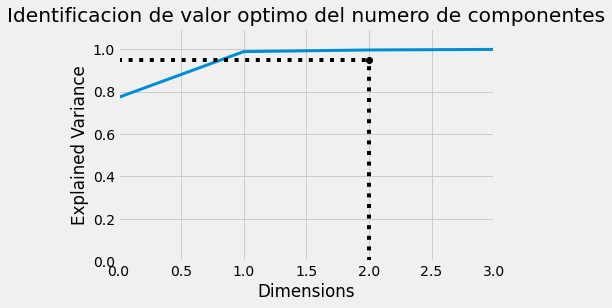

In [428]:
value_PCA(num_df,0.95)

In [431]:
#PCA de variables numericas
pca2 = PCA(n_components=2)
X_reduced = pca2.fit_transform(num_df)

X_pca = pd.DataFrame(X_reduced)# se convierte a dataframe

print("% varianza explicada:",np.sum(pca2.explained_variance_ratio_))

% varianza explicada: 0.9887745452294572


In [141]:
from sklearn.cluster import KMeans

In [397]:
# funcion para aplicar 
def best_k (start_k,stop_k,step_k,data_in,num_inicia,max_iteracion):
    
    rango = range(start_k,stop_k,step_k)
    rango2 = range(2,stop_k,step_k)
        
    kmeans_kwargs = {  
          "init": "random",
          "n_init": num_inicia,
          "max_iter": max_iteracion,
          "random_state": 42,
          }
      
    # A list holds the SSE values for each k
    sse = []
    
    for k in rango:
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data_in)
        sse.append(kmeans.inertia_)
    
    #localizacion del valor optimo del cluster
    from kneed import KneeLocator
    kl = KneeLocator(rango, sse, curve="convex", direction="decreasing")
    print('convex K',kl.elbow)
    
    # A list holds the silhouette coefficients for each k
    from sklearn.metrics import silhouette_score
    silhouette_coefficients = []
    
    # Notice you start at 2 clusters for silhouette coefficient
    for k in rango2:
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data_in)
        score = silhouette_score(data_in, kmeans.labels_)
        silhouette_coefficients.append(score) 
    
    #visualization     
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=False, sharey=False)
    
    fig.suptitle(f"Elbow and Silhouette", fontsize=12)
    
    ax1.plot(rango, sse)
    ax1.set_xticks(rango, minor=False)
    ax1.set_title(f"Elbow Method", fontdict={"fontsize": 12})
    
    ax2.plot(rango2, silhouette_coefficients)
    ax2.set_xticks(rango2)
    ax2.set_title(f'Silhouette Coefficients',fontdict={"fontsize":12})

convex K 5


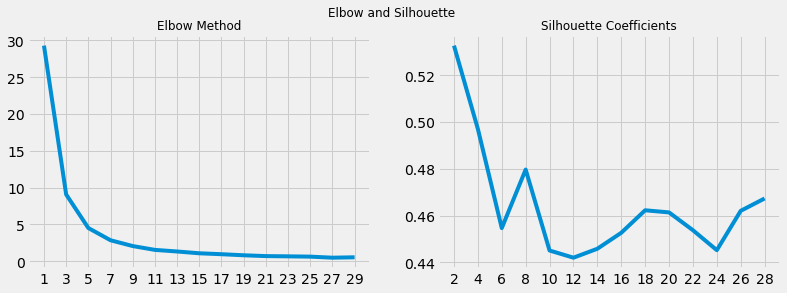

In [398]:
best_k(1,30,2,X_reduced,10,100)

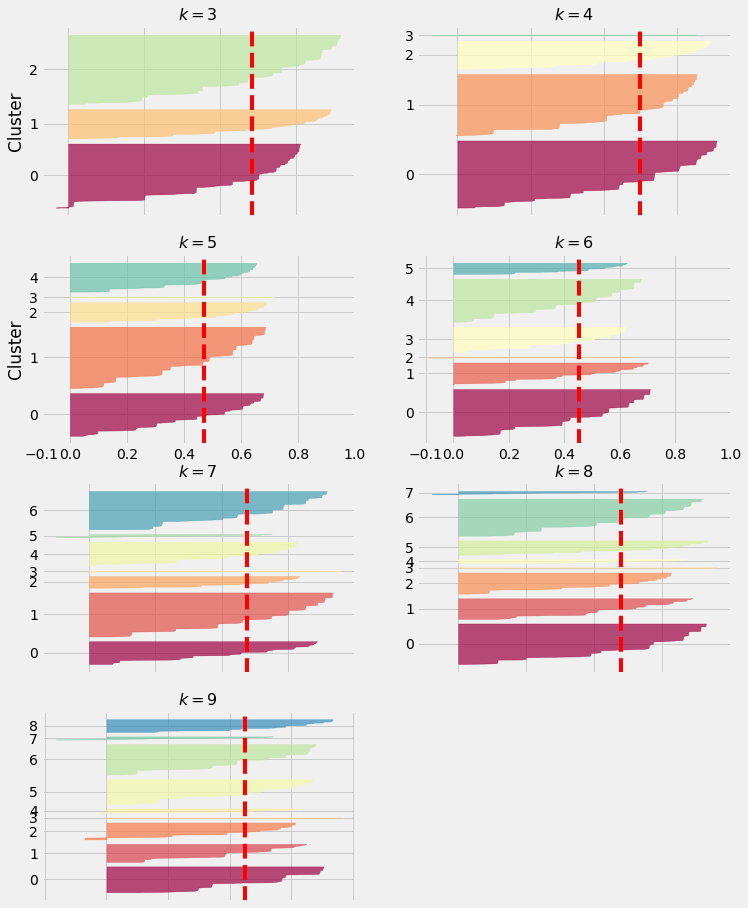

In [401]:
coef_silueta(X_reduced,10,4,2)

In [400]:
avg_silhouette(X_reduced,20,2)

* Para k =  3  el promedio de la silueta es de : 0.48210490001926887
* Para k =  5  el promedio de la silueta es de : 0.4702971848068841
* Para k =  7  el promedio de la silueta es de : 0.47586288743283206
* Para k =  9  el promedio de la silueta es de : 0.46402236660163576
* Para k =  11  el promedio de la silueta es de : 0.4731534631524211
* Para k =  13  el promedio de la silueta es de : 0.4494718466676665
* Para k =  15  el promedio de la silueta es de : 0.47381268382346814
* Para k =  17  el promedio de la silueta es de : 0.4613480577832535
* Para k =  19  el promedio de la silueta es de : 0.46345573275312407


### Modelos

### DBSCAN

In [414]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3)
dbscan.fit(X_reduced)
print(dbscan.labels_[:10])
dbscan_silhouette = silhouette_score(X_reduced, dbscan.labels_).round (2)

[0 0 0 0 0 0 0 0 0 0]


### K-Means

In [415]:
kmeansn = KMeans(n_clusters=5, random_state=0)#39 # se definen parametros 
kmeansn.fit(X_reduced)
kmeans_silhouette = silhouette_score(X_reduced, kmeansn.labels_).round(2)

### Minibatch Kmeans

In [164]:
from sklearn.cluster import MiniBatchKMeans
# Create k-mean object
cluster_mb_km= MiniBatchKMeans(n_clusters=5, random_state=0, batch_size=100)

# Train model
model_mini_k = cluster_mb_km.fit(X_reduced)

#verificacion centroides
print(model_mini_k.labels_)

kmeansm_silhouette = silhouette_score(X_reduced, model_mini_k.labels_).round(2)

In [420]:
print('Coeficientes de silueta','K-means:', kmeans_silhouette ,'DBSCAN:', dbscan_silhouette, 'Minibatch K-means',kmeansm_silhouette,sep='\n')

Coeficientes de silueta
K-means:
0.47
DBSCAN:
0.82
Minibatch K-means
0.5


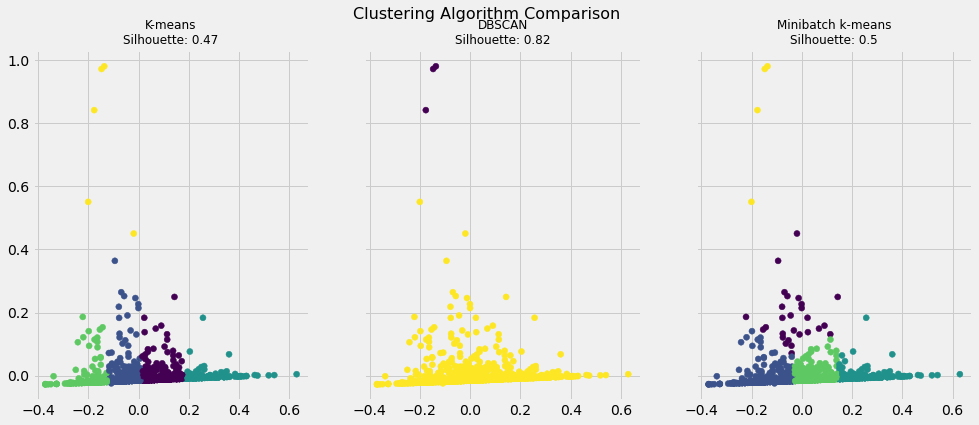

In [423]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 6), sharex=True, sharey=True)

fig.suptitle(f"Clustering Algorithm Comparison", fontsize=16)

#Vectores a los que se asignado cada observacion
label_kmeans_num = kmeansn.labels_ 
label_dbscan_num= dbscan.labels_
labels_minibatch_num= model_mini_k.labels_

# The k-means plot
ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], c=label_kmeans_num)
ax1.set_title(f"K-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

# The dbscan plot
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], c=label_dbscan_num)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})

#Minibatch
ax3.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_minibatch_num)
ax3.set_title(f"Minibatch k-means\nSilhouette: {kmeansm_silhouette}", fontdict={"fontsize": 12})
plt.show()

In [170]:
# se transforman como una lista
cluster_k_num = pd.Series(kmeansn.labels_)
cluster_db_num = pd.Series(dbscan.labels_)
cluster_km_num = pd.Series(model_mini_k.labels_)

In [267]:
#se unen al dataset de variables numericas
num_df["clust_kmeans"] = cluster_k_num 
num_df["clust_dbscan"] = cluster_db_num
num_df["clust_minibatch"] = cluster_km_num

Text(0.5, 1.0, 'Cluster Minibatch')

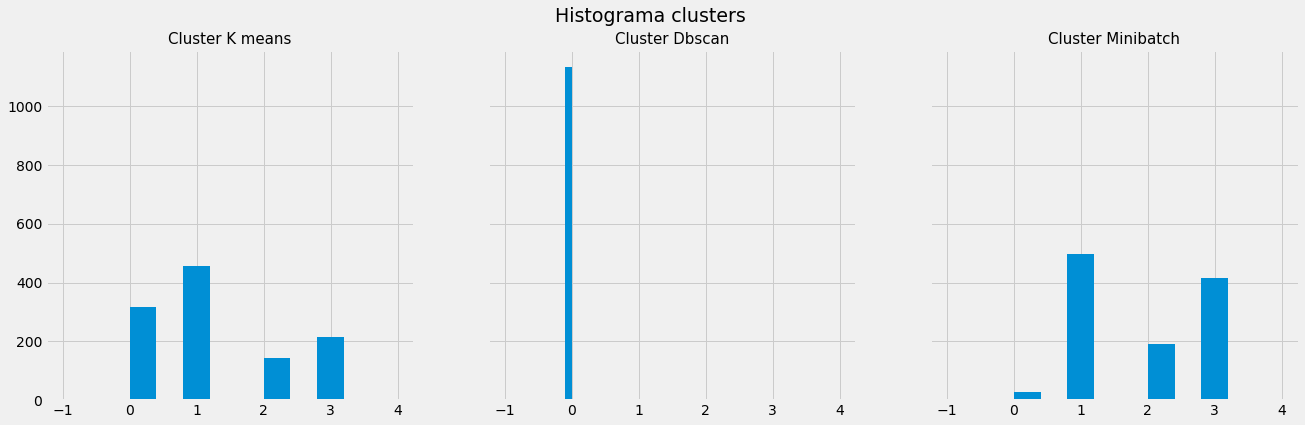

In [268]:
# se realiza histograma para ver la distribucion de los cluster

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)

fig.suptitle(f"Histograma clusters", fontsize=19)

ax1.hist(cluster_k_num)
ax1.set_title("Cluster K means",fontsize=15)

ax2.hist(cluster_db_num)
ax2.set_title("Cluster Dbscan",fontsize=15)

ax3.hist(cluster_km_num)
ax3.set_title("Cluster Minibatch",fontsize=15)

In [269]:
num_df.head()

isAdult  averageRating  numVotes  clust_kmeans  clust_dbscan  \
0      0.0       0.700000  0.001057             1             0   
1      0.0       0.577778  0.001197             0             0   
2      0.0       0.711111  0.000038             1             0   
3      0.0       0.855556  0.003932             3             0   
4      0.0       0.733333  0.007407             1             0   

   clust_minibatch  
0                1  
1                3  
2                1  
3                1  
4                1

# PCA 2 | NPL

In [174]:
df_vector_npl.shape

(1136, 700)

In [175]:
#metodo para hallar el componente principal que explica el 92% de varianza
pca = PCA()
pca.fit(df_vector_npl)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.92) + 1

In [176]:
d

434

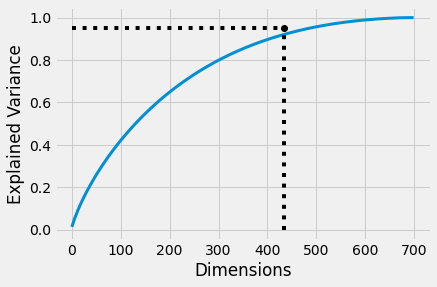

In [177]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

In [178]:
# se realiza PCA definiendo el numero de componente previamente identificado
pca_npl= PCA(n_components=434)
npl_reduced = pca_npl.fit_transform(df_vector_npl)

In [179]:
pca_npl.n_components

434

In [180]:
np.sum(pca_npl.explained_variance_ratio_)

0.918311415426599

### K-means NPL

convex K 16


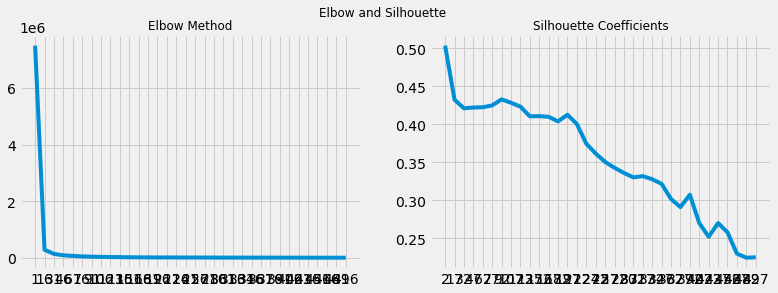

In [402]:
best_k(1,500,15,df_vector_npl,20,150)

In [404]:
##se definen parametros para hallar el valor de k 
#kmeans_kwargs = {  
#      "init": "random",
#      "n_init": 20,
#      "max_iter": 150,
#      "random_state": 42,
#      }
#  
## A list holds the SSE values for each k
#sse = []
#for k in range(1, 500,10):
#    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#    kmeans.fit(npl_reduced)
#    sse.append(kmeans.inertia_)

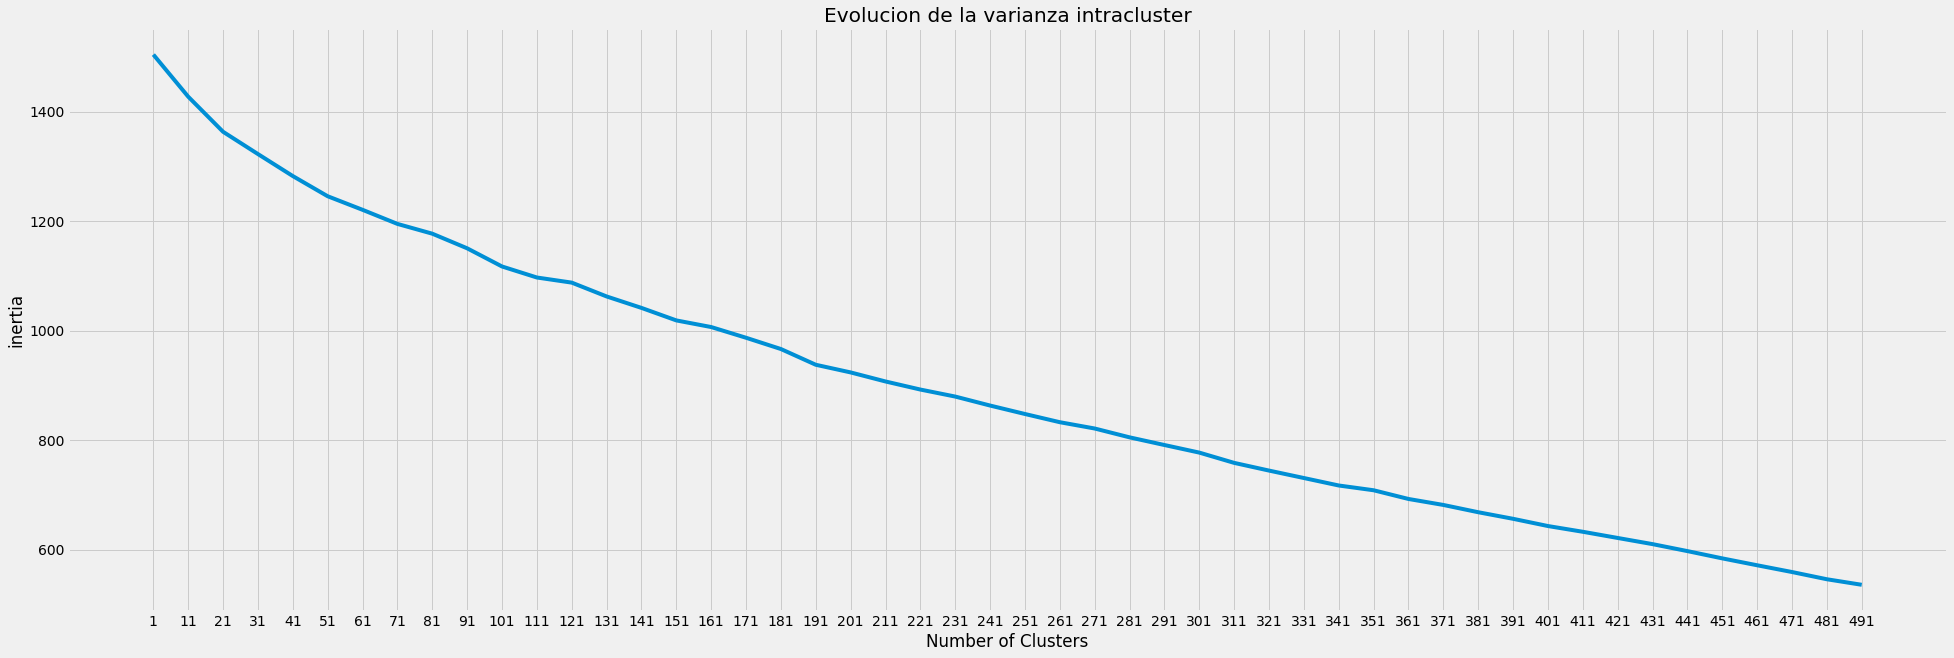

In [182]:
plt.figure(figsize=(30,10))
plt.style.use("fivethirtyeight")

plt.plot(range(1, 500,10),sse)
plt.xticks(range(1, 500,10))
plt.xlabel("Number of Clusters")
plt.ylabel("inertia")
plt.title('Evolucion de la varianza intracluster')
plt.show()

In [183]:
## localiza el número de cluster en un conjunto de datos
#kl3 = KneeLocator(range(1, 500,10), sse, curve="convex", direction="decreasing")
#kl3.elbow

191

In [184]:
## A list holds the silhouette coefficients for each k
#silhouette_coefficients = []
#rango = range(2,100)
#
## Notice you start at 2 clusters for silhouette coefficient
#for k in rango:
#    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#    kmeans.fit_predict(npl_reduced)
#    score = silhouette_score(npl_reduced, kmeans.labels_)
#    silhouette_coefficients.append(score) 

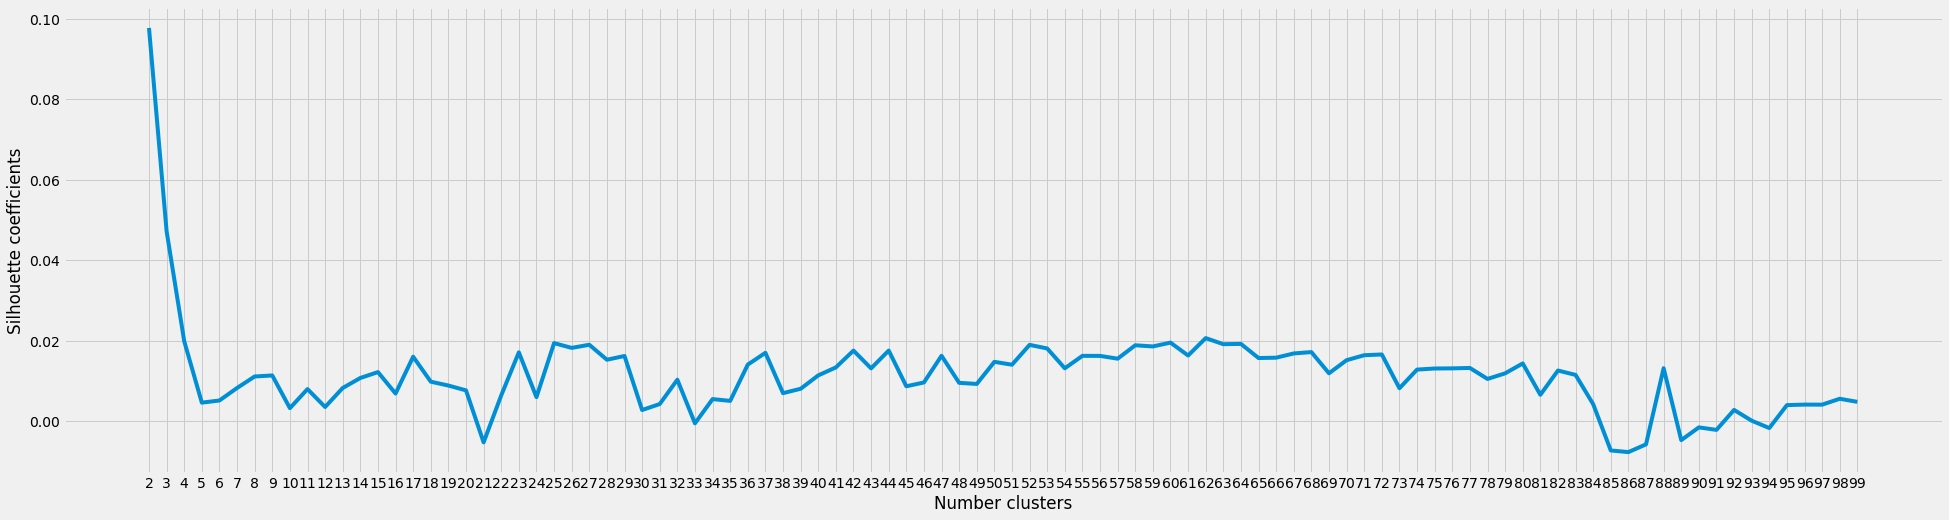

In [185]:
#coeficiente de silueta para hallar el mejor k 
plt.figure(figsize=(30,8))
plt.plot(rango,silhouette_coefficients)
plt.xlabel('Number clusters')
plt.ylabel('Silhouette coefficients')
plt.xticks(rango)
plt.show()

In [403]:
avg_silhouette(df_vector_npl,60,10)

* Para k =  11  el promedio de la silueta es de : 0.44633009329429074
* Para k =  21  el promedio de la silueta es de : 0.4609470608564451
* Para k =  31  el promedio de la silueta es de : 0.4578586503692271
* Para k =  41  el promedio de la silueta es de : 0.46061544175568003
* Para k =  51  el promedio de la silueta es de : 0.46148201193090255


El objeto devuelto por KMeans() contiene entre otros datos: la media de cada una de las variables para cada cluster (cluster_centers_), es decir, los centroides. Un vector indicando a qué cluster se ha asignado cada observación (.labels_) y la suma total de cuadrados internos de todos los clusters (.inertia_).

# Kmeans | DBSCAN NPL

#### Kmeans = 72

In [187]:
kmeans_npl = KMeans(n_clusters=72,random_state= 42)

In [188]:
kmeans_npl.fit(npl_reduced)

KMeans(n_clusters=72, random_state=42)

In [189]:
kmeans_silhouette_npl = silhouette_score(npl_reduced, kmeans_npl.labels_)#.round(5)

#### Kmeans = 191

In [190]:
kmeans_npl_2 = KMeans(n_clusters=190,random_state= 42)

In [191]:
kmeans_npl_2.fit(npl_reduced)

KMeans(n_clusters=190, random_state=42)

In [192]:
#la media de cada una de las variables para cada cluster (cluster_centers_), es decir, los centroides
print(kmeans_npl_2.cluster_centers_)

[[-0.02362503  0.00622524  0.01401495 ...  0.00112315  0.00811159
  -0.00419027]
 [-0.04582384  0.00346361 -0.03327102 ... -0.02428947  0.00319414
  -0.00637033]
 [ 0.03796121 -0.00503961 -0.02180826 ...  0.00870991 -0.00634843
  -0.01158965]
 ...
 [-0.03623179 -0.04364597 -0.00233027 ...  0.0053896  -0.01039784
   0.00903488]
 [-0.02241673  0.03168275 -0.0347749  ...  0.00102112 -0.00767571
  -0.01525631]
 [-0.02326368 -0.00124079 -0.06224946 ...  0.01339497  0.02055055
   0.00746909]]


In [193]:
#n vector indicando a qué cluster se ha asignado cada observación (.labels_)
print(kmeans_npl_2.labels_)

[ 33 179  54 ... 125 180  33]


In [194]:
#suma total de cuadrados internos de todos los clusters (.inertia_).
print(kmeans_npl_2.inertia_)

880.1275422005384


In [195]:
kmeans_silhouette_npl_2 = silhouette_score(npl_reduced, kmeans_npl_2.labels_)#.round(5)

In [196]:
labelsk1 = kmeans_npl.labels_
labelsk2 = kmeans_npl_2.labels_

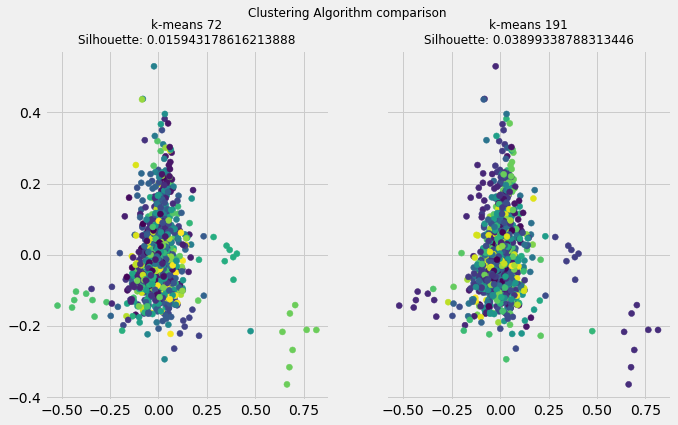

In [197]:
# comparacion de los resultados asignando distintos valores a k 
# basandonos en los resultados de las graficas de inercia y coeficiente de silueta
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)

fig.suptitle(f"Clustering Algorithm comparison", fontsize=12)

# The k-means plot 72
ax1.scatter(npl_reduced[:, 5], npl_reduced[:, 2], c=labelsk1)
ax1.set_title(f"k-means 72\nSilhouette: {kmeans_silhouette_npl}", fontdict={"fontsize": 12})

# The k-means plot 191
ax2.scatter(npl_reduced[:, 5], npl_reduced[:, 2], c=labelsk2)
ax2.set_title(f"k-means 191\nSilhouette: {kmeans_silhouette_npl_2}", fontdict={"fontsize": 12})

plt.show()

In [198]:
df_vector_npl.head()

desc_0  desc_1  desc_2  desc_3  desc_4  desc_5  desc_6  desc_7  desc_8  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   desc_9  ...  title_190  title_191  title_192  title_193  title_194  \
0     0.0  ...        0.0        0.0        0.0        0.0        0.0   
1     0.0  ...        0.0        0.0        0.0        0.0        0.0   
2     0.0  ...        0.0        0.0        0.0        0.0        0.0   
3     0.0  ...        0.0        0.0        0.0        0.0        0.0   
4     0.0  ...        0.0        0.0        0.0        0.0        0.0   

   title_195  title_196  title_197  title_198  title_199  
0        0.0        0.0        0.0        0.0        0.0  
1        0.0        0.0        0.0        0.0        0.0  
2        0.0        0.0        0.0        0.0        0.0  
3        0.0        0.0        0.0        0.0        0.0  
4        0.0        0.0        0.0        0.0        0.0  

[5 rows x 700 columns]

### Sistema de recomendacion

In [199]:
#def cosine_similarity(vector1, vector2):
#    vector1 = np.array(vector1)
#    vector2 = np.array(vector2)
#    return np.dot(vector1, vector2) / (np.sqrt(np.sum(vector1*2)) * np.sqrt(np.sum(vector2*2)))

In [200]:
#similarity1 = cosine_similarity(npl_reduced[:,1],npl_reduced[:,2])
#similarity2 = cosine_similarity(npl_reduced[:,1],npl_reduced[:,3])
#similarity3 = cosine_similarity(npl_reduced[:,2],npl_reduced[:,3])
#
#print ('S 1-2:',similarity1,'S 1-3:',similarity2,'S 2-3:',similarity3, sep='\n')

In [201]:
#function datacamp
#def get_recommendations(title, cosine_sim=cosine_sim):
#            idx = indices[title]
#            sim_scores = list(enumerate(cosine_sim[idx]))
#            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
#            sim_scores = sim_scores[1:6]
#            movie_indices = [i[0] for i in sim_scores]
#            return metadata['title'].iloc[movie_indices]
#    
#        
#        
#        prediction=get_recommendations(movie_name)
#        pred=prediction.to_frame() #now it is panda frame
#        pred.set_index('title',inplace=True) #index changeg
#        predic=pred

In [202]:
#def mvp_recommender(user_input):#input data
#    df_sample_title = pd.DataFrame([user_input])#convierte a un dataframe los datos entragados por el usuario
#
#    preprocessed_sample = preprocess(df_sample_title,
#                                       column_name=[0],\
#                                       language='english',\
#                                       html_tags=False,\
#                                       stemming=True,\
#                                       stop_words = True)
#
#    bow_sample = name_bow_vectorizer.transform(preprocessed_sample).toarray()
#    #devuelve un vector con una distancia como array para preprocessed sample
#    
#    print("BOLSA DE PALABRAS:\n",bow_sample)
#
#    temp_similarity = []#donde se almacenara j es [0 ]y coseno de similitud [1]
#    
#    print("SIMILITUD:\n",temp_similarity)
#
#    for j in range(0, name_bow_tfidf.shape[0]): 
#        temp_similarity.append([j, cosine_similarity(bow_sample, name_bow_tfidf.toarray()[j]) [0]])
#        #creara dos columnas una con los indices y otra con el coseno de similitud
#        #[0] regresara solo un numero 
#
#    #print(temp_similarity)
#    
#    similar_courses = pd.DataFrame(temp_similarity).sort_values(by=[1],ascending=False)#si es ascendente generara error
#    print("VALORES MAS ALTOS DE SIMILITUD\n",similar_courses) #ordenara los valores mas altos de similitud
#    
#    similar_coursesl = similar_courses.loc[similar_courses[1]>0].head(5)#regresara las 5 primeras
#    #similitudes mas peque;as el [1] expecifica que se tomara como referencia el coseno de similitud y se establece la condicion
#    #de si sera 0, si es 0 tiene mas similitud 
#    print("VALORES MAS ALTOS DE SIMILITUD ORDENADOS\n",similar_coursesl) 
#
#    result=similar_coursesl.merge(dfp['title'],left_on=0,right_index=True, how='left')
#    print("MATRIZ DE RESULTADOS CONCATENADOS CON LOS TITULOS\n",result)#se tendra una matrix de similitudes entre el indice de similar courses p
#    #en las que como condiciones del merge se tendran como indices el title
#    
#    #se ha entrenado el algoritmo y despues se llama el algoritmo original para dar recomendaciones de los titulos
#    
#    return result

### DBSCAN

In [203]:
dbscan_npl = DBSCAN(eps=1.33,min_samples=10)

In [204]:
dbscan_npl.fit(npl_reduced)

DBSCAN(eps=1.33, min_samples=10)

In [205]:
dbscan_npl.labels_[:10]

array([-1,  0,  1,  1, -1, -1,  1,  1,  1,  1], dtype=int64)

In [206]:
np.unique(dbscan_npl.labels_)

array([-1,  0,  1], dtype=int64)

In [207]:
len(dbscan_npl.core_sample_indices_)

625

In [208]:
dbscan_npl.core_sample_indices_[:3]

array([1, 2, 3], dtype=int64)

In [209]:
#dbscan_npl.components_[:2]

In [210]:
np.unique(dbscan_npl.labels_)

array([-1,  0,  1], dtype=int64)

In [211]:
dbscan_silhouette_npl = silhouette_score(npl_reduced, dbscan_npl.labels_)

In [212]:
print('kmeans:', kmeans_silhouette_npl_2 , "DBSCAN",dbscan_silhouette_npl , sep='\n')

kmeans:
0.03899338788313446
DBSCAN
0.052216376341117414


Se visualizan resultados obtenidos con k-means con valor de  k=191 y dbscan

In [213]:
labels3 = kmeans_npl_2.labels_
labnpl = dbscan_npl.labels_

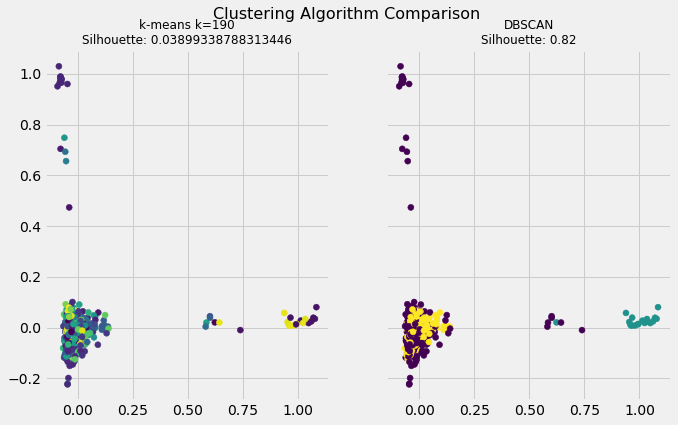

In [214]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)

fig.suptitle(f"Clustering Algorithm Comparison", fontsize=16)

# The k-means plot
#km_colors = [fte_colors1[label] for label in kmeansn.labels_]
ax1.scatter(npl_reduced[:, 0], npl_reduced[:, 1], c=labels3)
ax1.set_title(f"k-means k=190\nSilhouette: {kmeans_silhouette_npl_2 }", fontdict={"fontsize": 12})

# The dbscan plot
#db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(npl_reduced[:, 0], npl_reduced[:, 1], c=labnpl)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})
plt.show()

podemos calcular la distancia de cad apunto a sus k-vecinos mas cercanos usando knn
El punto en si mismo esta incluido en n_neighbors. el metodo knn
devuelve dos arrays, uno que contiene la distancia
a los 'n_neighbors' puntos mas cercanos
y el otro que contiene el indice de cada uno de estos puntos


In [407]:
# KNN para hallar un valor aproximado para el mejor eps
def best_epsilon(data_input,num_neigh):
    
    from sklearn.neighbors import NearestNeighbors
    
    X=data_input
    
    neigh = NearestNeighbors(n_neighbors=num_neigh)#75
    nbrs = neigh.fit(X)
    distancias , indices = nbrs.kneighbors(X)
    
    #grafica para el mejor Epsilon
    distancias = np.sort(distancias, axis = 0)#ordena
    distancias = distancias[:,num_neigh -1]#me quedo con la ultima columna, la que tiene la mayor distancias
    
    fig = plt.figure(figsize=(7,7))
    plt.plot(distancias)
    plt.xlabel("puntos")
    plt.ylabel("distancia")
    

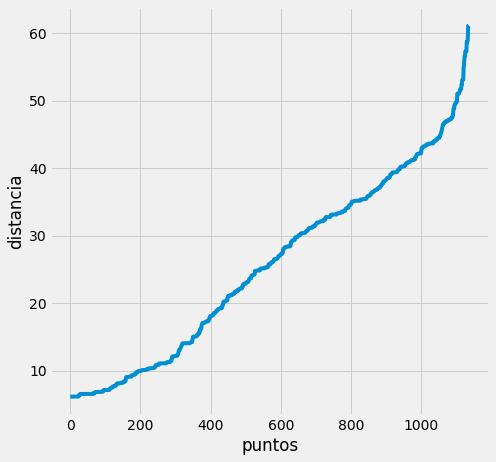

In [408]:
best_epsilon(df_vector_npl,75)

## Minibatch

In [222]:
minib_npl= MiniBatchKMeans(n_clusters=190, random_state=0, batch_size=100)

In [223]:
# Train model
model_minib_npl = minib_npl.fit(npl_reduced)

C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:888: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1



In [224]:
model_minib_npl.labels_

array([103, 104, 176, ..., 170, 159, 176])

Se concatenan los clusters creados al dataset inicial

In [225]:
# se transforman como una lista
cluster_kmeans_npl = pd.Series(kmeans_npl_2.labels_)
cluster_db_npl = pd.Series(dbscan_npl.labels_)
cluster_minib_npl = pd.Series(model_minib_npl.labels_) 

In [226]:
#se unen al dataset de variables categoricas
df_vector_npl["clust_kmeans_npl"] = cluster_kmeans_npl
df_vector_npl["clust_dbscan_npl"] = cluster_db_npl
df_vector_npl["clust_minibatch_npl"] = cluster_minib_npl

In [227]:
df_vector_npl.head()

desc_0  desc_1  desc_2  desc_3  desc_4  desc_5  desc_6  desc_7  desc_8  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   desc_9  ...  title_193  title_194  title_195  title_196  title_197  \
0     0.0  ...        0.0        0.0        0.0        0.0        0.0   
1     0.0  ...        0.0        0.0        0.0        0.0        0.0   
2     0.0  ...        0.0        0.0        0.0        0.0        0.0   
3     0.0  ...        0.0        0.0        0.0        0.0        0.0   
4     0.0  ...        0.0        0.0        0.0        0.0        0.0   

   title_198  title_199  clust_kmeans_npl  clust_dbscan_npl  \
0        0.0        0.0                33                -1   
1        0.0        0.0               179                 0   
2        0.0        0.0                54                 1   
3        0.0        0.0               146                 1   
4        0.0        0.0                89                -1   

   clust_minibatch_npl  
0                  103  
1                  104  
2                  176  
3                   34  
4                  169  

[5 rows x 703 columns]

# PCA 3 | Variables Dummy

In [228]:
df_dummy.shape

(1136, 8101)

In [229]:
pca = PCA()
pca.fit(df_dummy)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.92) + 1
d

750

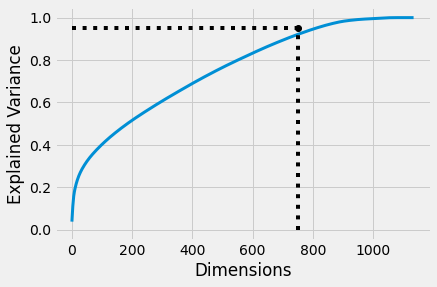

In [230]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

In [231]:
pca_dummy= PCA(n_components=750)
dummy_reduced = pca_dummy.fit_transform(df_dummy)#df_dummy, data final para analizar

In [232]:
np.sum(pca_dummy.explained_variance_ratio_)

0.9159364945729362

Parametros k-means 

convex K 5


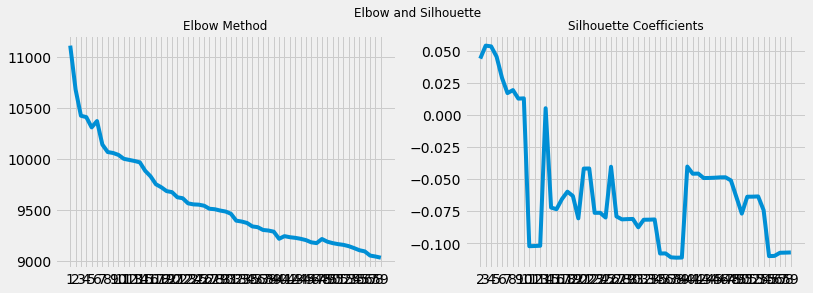

In [410]:
best_k (1,60,1,dummy_reduced,20,100)

In [233]:
kmeans_kwargs = {  
      "init": "random",
      "n_init": 20,
      "max_iter": 100,
      "random_state": 93,
      }
rango = range(1,60)
# A list holds the SSE values for each k
sse = []
for k in rango:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dummy_reduced)
    sse.append(kmeans.inertia_)

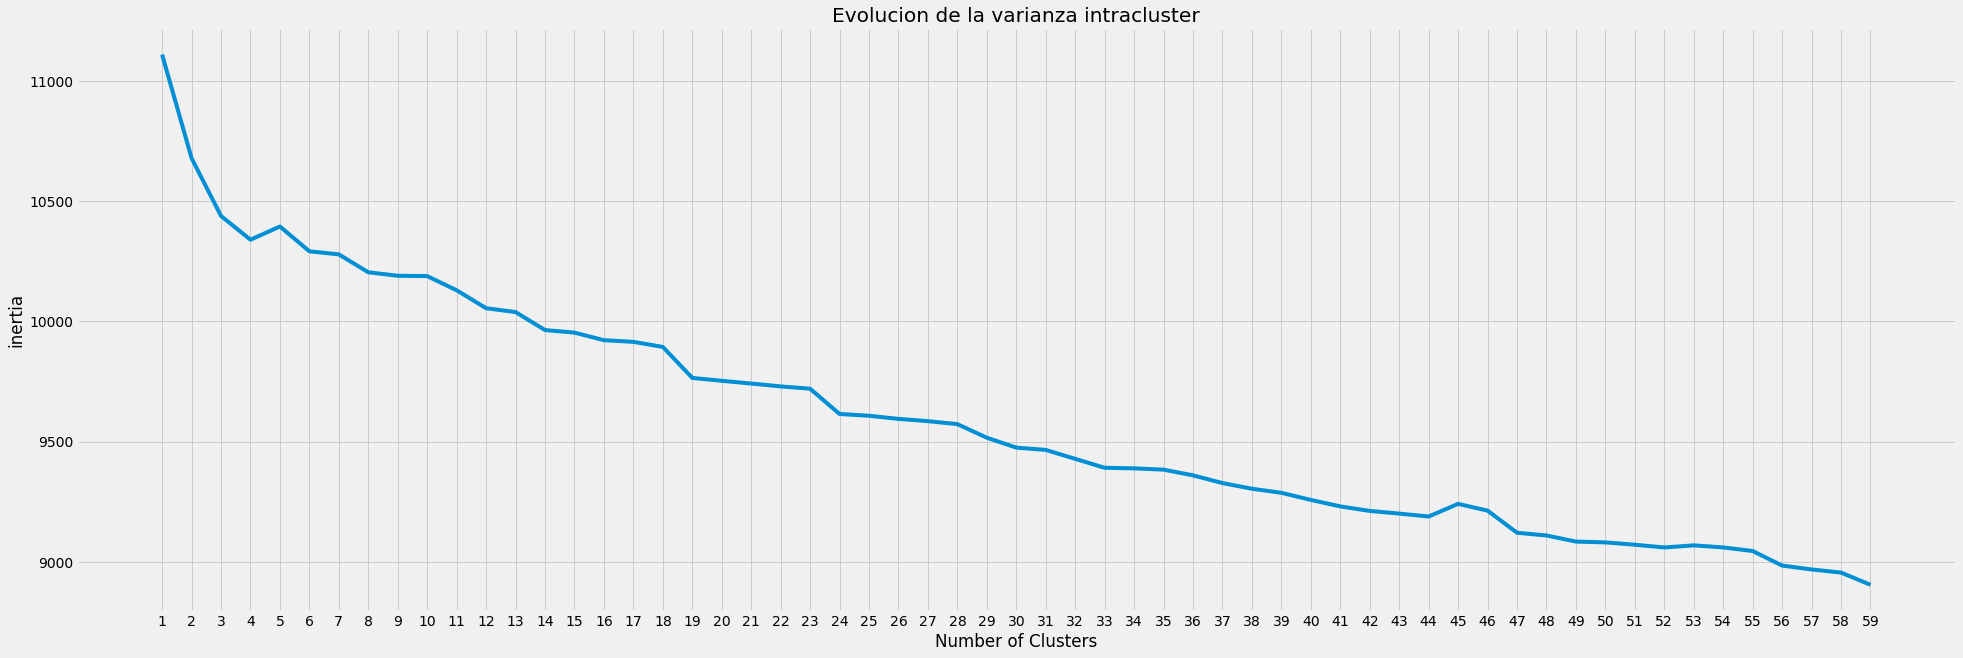

In [234]:
plt.figure(figsize=(30,10))
plt.plot(rango,sse)
plt.xticks(rango)
plt.xlabel("Number of Clusters")
plt.ylabel("inertia")
plt.title('Evolucion de la varianza intracluster')
plt.show()

In [235]:
kl4 = KneeLocator(rango, sse, curve="convex", direction="decreasing")
kl4.elbow

4

con 800 muestras a 10, da 141| con 200 en intervalos de 30, da 61| con 100 en intervalos de 10, da 41| con muestras de 1 a 60, sin intervalos da 4

In [236]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
rango = range(2,100)

for k in rango:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit_predict(dummy_reduced)
    score = silhouette_score(dummy_reduced, kmeans.labels_)
    silhouette_coefficients.append(score) 

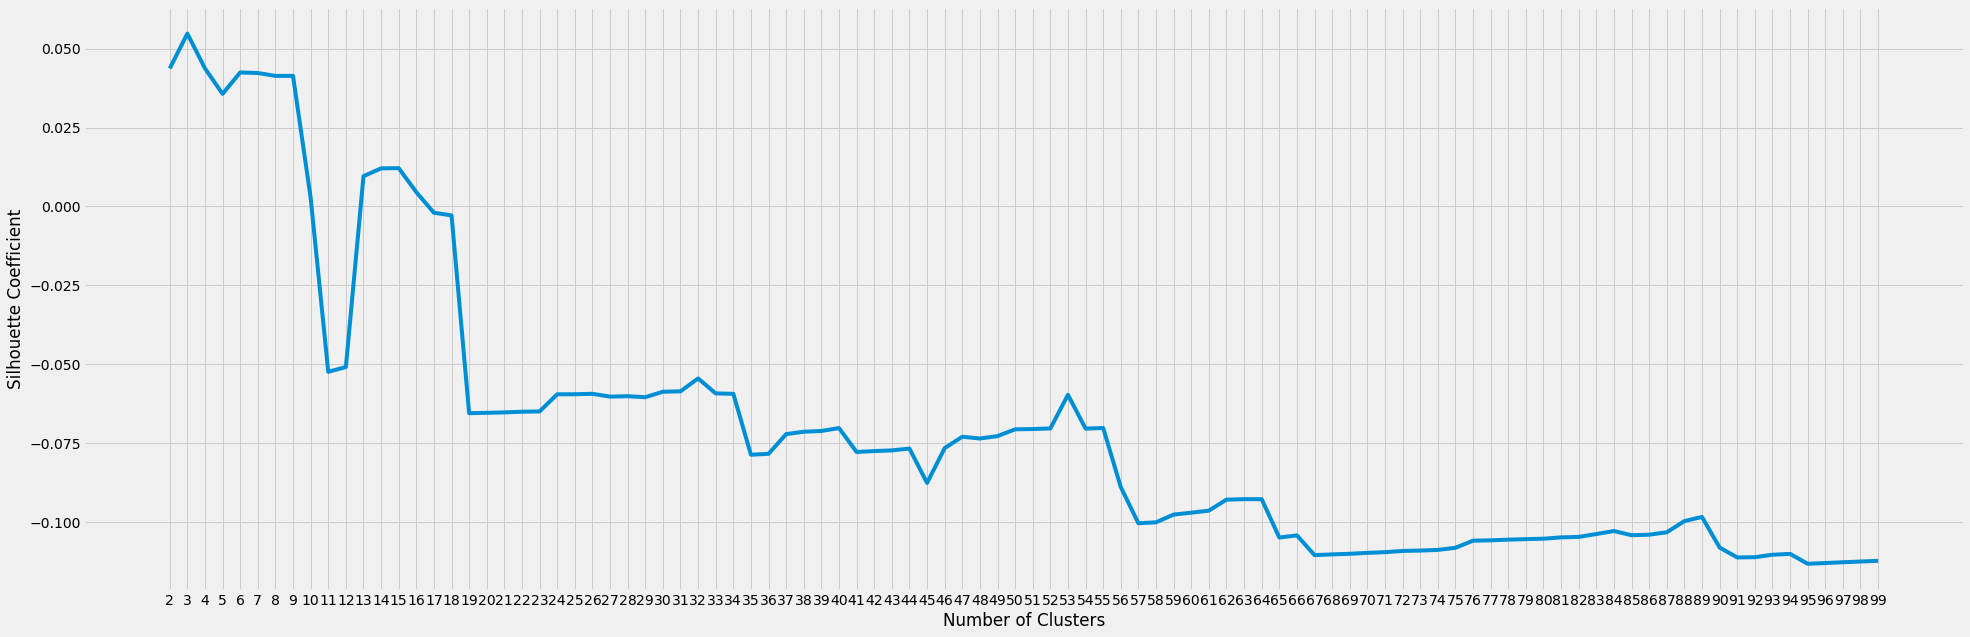

In [237]:
plt.figure(figsize=(30,10))
plt.style.use("fivethirtyeight")
plt.plot(rango, silhouette_coefficients)
plt.xticks(rango)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

De acuerdo a la grafica de inercia de opta por usar k=4

In [411]:
avg_silhouette(dummy_reduced,10,1)

* Para k =  2  el promedio de la silueta es de : 0.043819163288120716
* Para k =  3  el promedio de la silueta es de : 0.03474728875435334
* Para k =  4  el promedio de la silueta es de : 0.03451760578095769
* Para k =  5  el promedio de la silueta es de : 0.05356632865506558
* Para k =  6  el promedio de la silueta es de : 0.012045205085356586
* Para k =  7  el promedio de la silueta es de : 0.044406171458801914
* Para k =  8  el promedio de la silueta es de : -0.046964907252621445
* Para k =  9  el promedio de la silueta es de : 0.029870309383464667


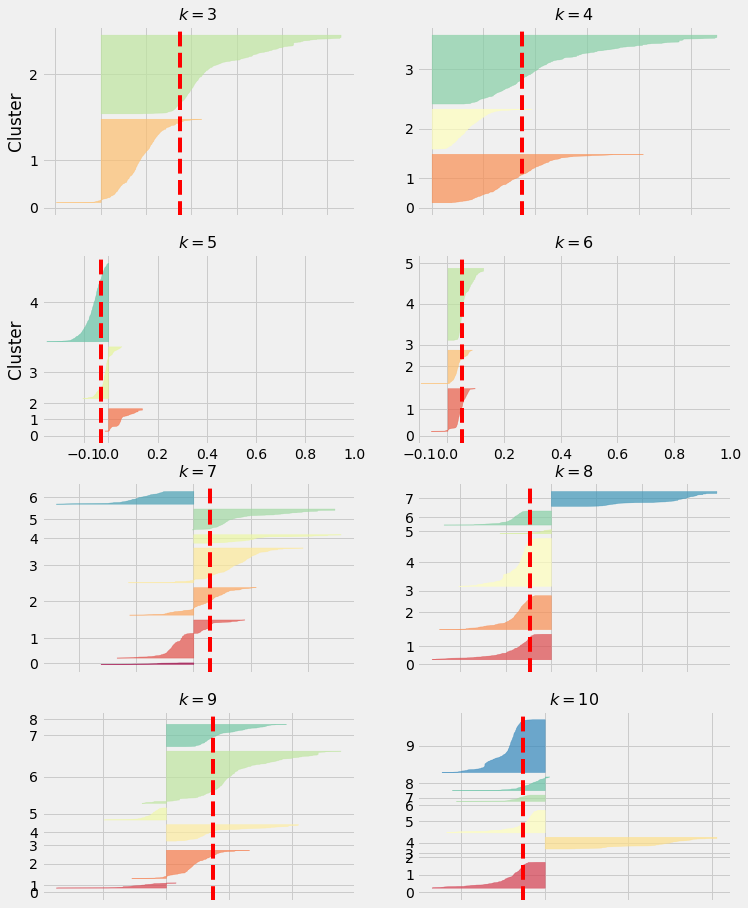

In [412]:
coef_silueta(dummy_reduced,11,4,2)

## K-means

In [242]:
kmeans_dummy = KMeans(n_clusters=4,random_state=93)
kmeans_dummy.fit(dummy_reduced)

KMeans(n_clusters=4, random_state=93)

In [243]:
kmeans_silhouette_dummy = silhouette_score(dummy_reduced, kmeans_dummy.labels_)

### DBSCAN DUMMY

In [244]:
dbscan_dummy = DBSCAN(eps=6.2,min_samples=10)
dbscan_dummy.fit(dummy_reduced)
np.unique(dbscan_dummy.labels_)

array([-1,  0], dtype=int64)

In [245]:
dbscan_silhouette_dummy = silhouette_score(dummy_reduced, dbscan_dummy.labels_)
print(dbscan_silhouette_dummy)

0.42532544246993675


In [246]:
labelsd = kmeans_dummy.labels_
lab=dbscan_dummy.labels_

Text(0.5, 1.0, 'DBSCAN \nSilhoutte:0.42532544246993675')

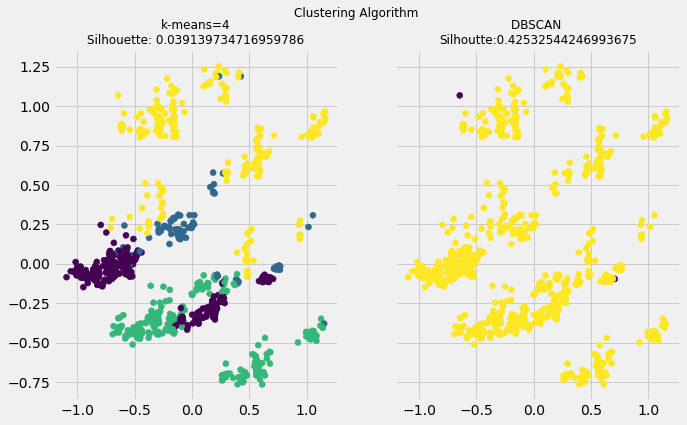

In [247]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)

fig.suptitle(f"Clustering Algorithm", fontsize=12)

# The k-means plot

ax1.scatter(dummy_reduced[:, 1], dummy_reduced[:, 3], c=labelsd)
ax1.set_title(f"k-means=4\nSilhouette: {kmeans_silhouette_dummy}", fontdict={"fontsize": 12})

ax2.scatter(dummy_reduced[:, 1], dummy_reduced[:, 3], c=lab)
ax2.set_title(f'DBSCAN \nSilhoutte:{dbscan_silhouette_dummy}',fontdict={"fontsize":12})

 k=4:  0,019 ,k=6:0,032, K=41:-0.070 ,K-61: -0,049, K=141 : -0,0991

#### A continuacion se hara la busqueda de un valor optimo de epsilon mediante KNN

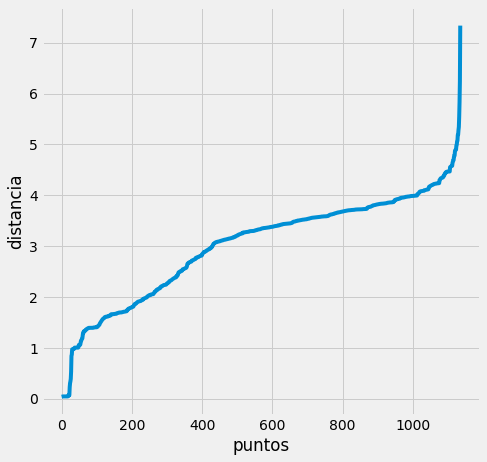

In [413]:
best_epsilon(dummy_reduced,20)

### Minibatch | dummy


In [250]:
# Create k-minibatch
minib_dummy= MiniBatchKMeans(n_clusters=4, random_state=0, batch_size=100)

In [251]:
# Train model
model_mini_dummy= minib_dummy.fit(dummy_reduced)

C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:888: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1



In [252]:
mini_silhouette_dummy = silhouette_score(dummy_reduced, model_mini_dummy.labels_)
print(mini_silhouette_dummy)

-0.1697981700691084


In [253]:
lab_du = model_mini_dummy.labels_

Text(0.5, 1.0, 'Mn-k-means=4\nSilhouette: -0.1697981700691084')

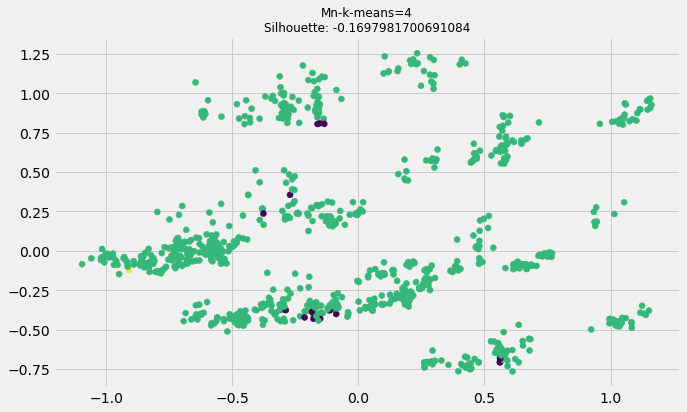

In [254]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6), sharex=True, sharey=True)

#The Minibatch-kmeans plot
ax1.scatter(dummy_reduced[:, 1], dummy_reduced[:, 3], c=lab_du)
ax1.set_title(f"Mn-k-means=4\nSilhouette: {mini_silhouette_dummy}", fontdict={"fontsize": 12})

In [255]:
# se transforman como una lista
cluster_kmeans_dum = pd.Series(kmeans_dummy.labels_)
cluster_db_dum = pd.Series(dbscan_dummy.labels_)
cluster_k_mini_dum = pd.Series(model_mini_dummy.labels_)

In [256]:
#se unen al datasetlos clusters identificados
df_dummy["clust_kmeans_Du"] = cluster_kmeans_dum
df_dummy["clust_dbscan_Du"] = cluster_db_dum
df_dummy["clust_minibatch_Du"] = cluster_k_mini_dum 

Text(0.5, 1.0, 'Cluster Minibatch')

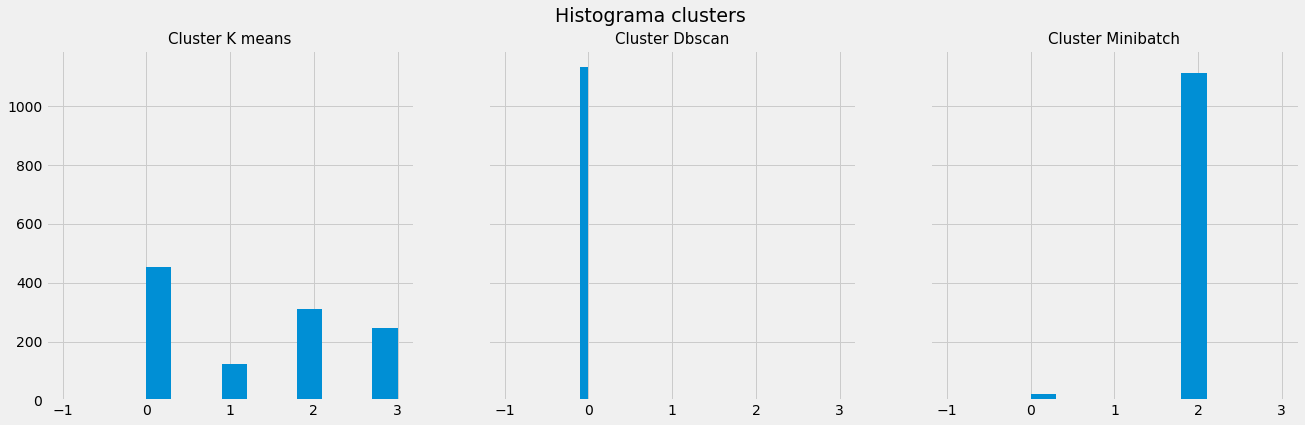

In [257]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)

fig.suptitle(f"Histograma clusters", fontsize=19)

# The k-means plot

ax1.hist(cluster_kmeans_dum)
ax1.set_title("Cluster K means",fontsize=15)

ax2.hist(cluster_db_dum)
ax2.set_title("Cluster Dbscan",fontsize=15)

ax3.hist(cluster_k_mini_dum)
ax3.set_title("Cluster Minibatch",fontsize=15)


In [258]:
df_dummy.head()

cast__0  cast__4minute  cast__50 cent  cast__aamir khan  \
4002        0              0              0                 0   
1495        0              0              0                 0   
2376        0              0              0                 0   
1157        0              0              0                 0   
1041        0              0              0                 0   

      cast__aaron eckhart  cast__aaron hernandez  cast__abbi jacobson  \
4002                    0                      0                    0   
1495                    0                      0                    0   
2376                    0                      0                    0   
1157                    0                      0                    0   
1041                    0                      0                    0   

      cast__abhay deol  cast__abhishek bachchan  cast__abir chatterjee  ...  \
4002                 0                        0                      0  ...   
1495                 0                        0                      0  ...   
2376                 0                        0                      0  ...   
1157                 0                        0                      0  ...   
1041                 0                        0                      0  ...   

      genre_Thriller  genre_War  genre_Western  cast__Adults  cast__Kids  \
4002               0          0              0             1           0   
1495               0          0              0             0           0   
2376               0          0              0             0           0   
1157               0          0              0             1           0   
1041               0          0              0             0           0   

      cast__Older Kids  cast__Teens  clust_kmeans_Du  clust_dbscan_Du  \
4002                 0            0              NaN              NaN   
1495                 1            0              NaN              NaN   
2376                 0            1              NaN              NaN   
1157                 0            0              NaN              NaN   
1041                 0            1              0.0              0.0   

      clust_minibatch_Du  
4002                 NaN  
1495                 NaN  
2376                 NaN  
1157                 NaN  
1041                 2.0  

[5 rows x 8104 columns]

# MCA 4 | variables categoricas

In [274]:
cat_df = cat_df.drop(['clust_kmeans','clust_dbscan','clust_minibatch'],axis=1)

In [297]:
cat_df.head()

year_added month_added release_year     type
4002     2019.0        11.0         2019    Movie
1495     2020.0         2.0         2019    Movie
2376     2017.0         5.0         1994    Movie
1157     2017.0         3.0         2017  TV Show
1041     2016.0        12.0         2016  TV Show

In [298]:
import prince
mca = prince.MCA(
    n_components=3,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
    )

In [299]:
mca = mca.fit(cat_df)

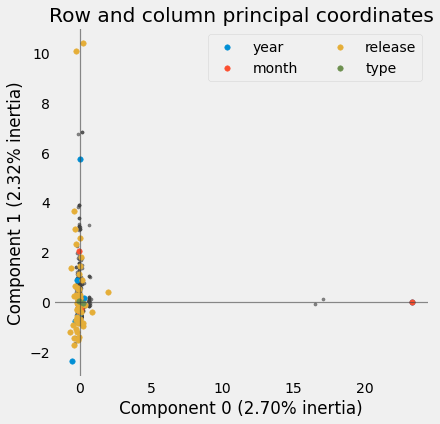

In [300]:
ax = mca.plot_coordinates(
     X=cat_df,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=2
     )

In [301]:
mca.eigenvalues_

[0.512382003340525, 0.4400937621912759, 0.4320535466051042]

In [302]:
mca.total_inertia_

19.0

In [303]:
mca.explained_inertia_

[0.02696747386002763, 0.02316282958901452, 0.022739660347637063]

In [307]:
mca = mca.fit_transform(cat_df)

In [308]:
mca

0         1         2
4002 -0.039257 -0.575468 -0.431705
1495 -0.092559 -0.263085 -0.566663
2376 -0.266329 -0.538744  0.538505
1157 -0.067029 -0.092914  0.412593
1041  0.291288 -0.108148  0.484620
...        ...       ...       ...
893   0.086752  0.039105 -1.463984
3628 -0.106358 -0.018403  0.519231
3026  0.019125 -0.433514  0.428407
399  -0.069156 -0.365110 -0.172360
635  -0.039257 -0.575468 -0.431705

[1136 rows x 3 columns]

# K-means categorico

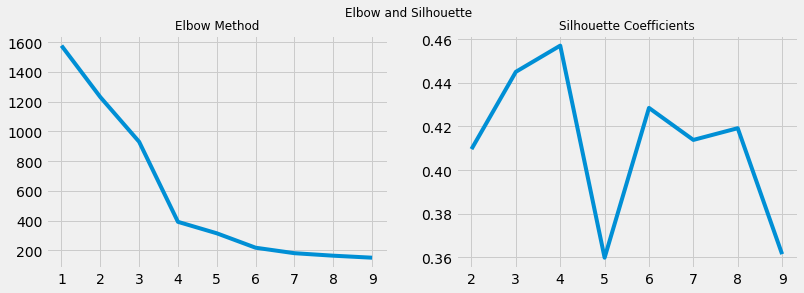

In [371]:
best_k(1,10,1,mca,10,100)

In [314]:
from sklearn.metrics import silhouette_samples
X=mca
max_k = 9 ## maximo número de clusters que vamos a crear
K = range(1,max_k)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    if 1<k<len(X):
             
        silhouette_avg = silhouette_score(mca, labels)
        print("* Para k = ",k, " el promedio de la silueta es de :",silhouette_avg)
        sample_silhouette_values = silhouette_samples(mca, labels)

* Para k =  2  el promedio de la silueta es de : 0.9370538191310648
* Para k =  3  el promedio de la silueta es de : 0.41403501958594463
* Para k =  4  el promedio de la silueta es de : 0.46118346279049194
* Para k =  5  el promedio de la silueta es de : 0.4747518762000121
* Para k =  6  el promedio de la silueta es de : 0.4284161479537851
* Para k =  7  el promedio de la silueta es de : 0.4152506108264701
* Para k =  8  el promedio de la silueta es de : 0.417930635583097


In [315]:
#inicia para evaluar el mejor k 
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(mca)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [316]:
silhouette_scores = [silhouette_score(mca, model.labels_)
                     for model in kmeans_per_k[1:]]

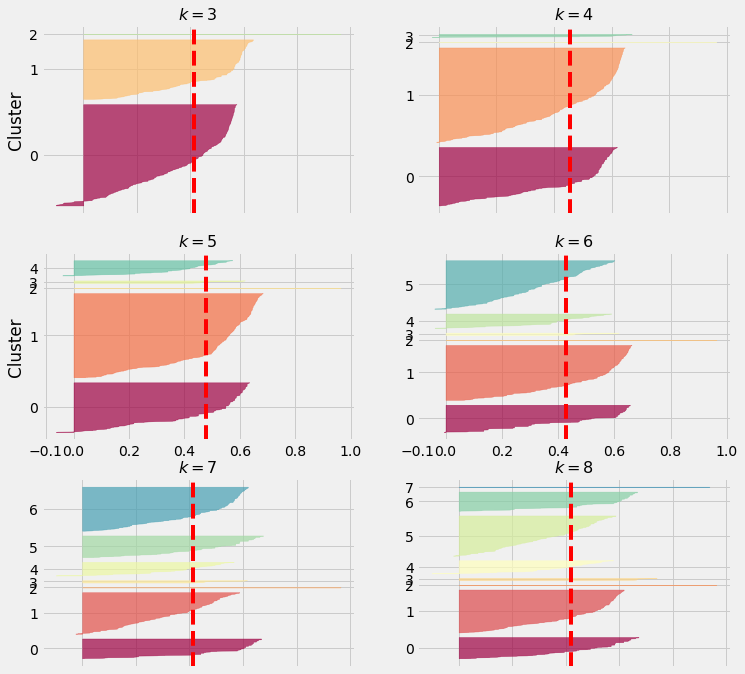

In [317]:
plt.figure(figsize=(11, 11))

for k in (3, 4, 5, 6,7,8):
    plt.subplot(3, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(mca, y_pred)

    padding = len(mca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        #plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### DBSCAN Categorico

In [318]:
dbscan = DBSCAN(eps=0.6)

In [319]:
dbscan.fit(mca)

DBSCAN(eps=0.6)

In [320]:
dbscan_silhouette_c = silhouette_score(mca, dbscan.labels_).round (2)

### K means Categorico

In [321]:
kmeans_c = KMeans(n_clusters=4)

In [322]:
kmeans_c.fit(mca)

KMeans(n_clusters=4)

In [323]:
kmeans_silhouette_c = silhouette_score(mca, kmeans_c.labels_).round(2)

In [324]:
print('kmeans:', kmeans_silhouette_c ,'dbscan:', dbscan_silhouette_c, sep='\n')

kmeans:
0.46
dbscan:
0.7


### Minibatch

In [325]:
# Create k-mean object
cat_mb_km= MiniBatchKMeans(n_clusters=4, random_state=0, batch_size=100)


In [326]:
# Train model
model_mini_cat = cat_mb_km.fit(mca)

C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:888: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1



In [327]:
model_mini_cat.labels_

array([2, 2, 0, ..., 0, 0, 2])

In [328]:
kmini_silhouette_mca = silhouette_score(mca, model_mini_cat.labels_)
print(kmini_silhouette_mca)

0.4043817751862984


In [329]:
# se transforman como una lista
cluster_kmeans_c = pd.Series(kmeans_c.labels_)
cluster_db_c = pd.Series(dbscan.labels_)
cat_k_mini = pd.Series(model_mini_cat.labels_)

In [330]:
#se unen al dataset de variables categoricas
cat_df["clust_kmeans"] = cluster_kmeans_c
cat_df["clust_dbscan"] = cluster_db_c
cat_df["clust_minibatch"] = cat_k_mini

Text(0.5, 1.0, 'Cluster Minibatch')

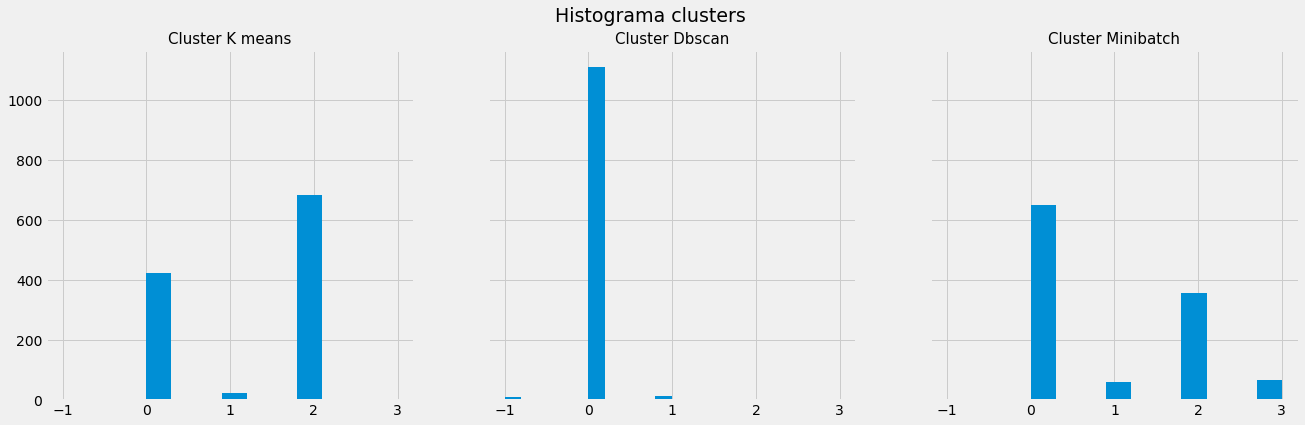

In [331]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)

fig.suptitle(f"Histograma clusters", fontsize=19)

# The k-means plot

ax1.hist(cluster_kmeans_c)
ax1.set_title("Cluster K means",fontsize=15)

ax2.hist(cluster_db_c)
ax2.set_title("Cluster Dbscan",fontsize=15)

ax3.hist(cat_k_mini)
ax3.set_title("Cluster Minibatch",fontsize=15)


In [332]:
cat_df.head()

year_added month_added release_year     type  clust_kmeans  clust_dbscan  \
4002     2019.0        11.0         2019    Movie           NaN           NaN   
1495     2020.0         2.0         2019    Movie           NaN           NaN   
2376     2017.0         5.0         1994    Movie           NaN           NaN   
1157     2017.0         3.0         2017  TV Show           NaN           NaN   
1041     2016.0        12.0         2016  TV Show           1.0           1.0   

      clust_minibatch  
4002              NaN  
1495              NaN  
2376              NaN  
1157              NaN  
1041              3.0

In [367]:
# funcion para aplicar 
def best_k (start,stop,step,data_in,num_inicia,max_iteracion):
    
    rango = range(start,stop,step)
    rango2 = range(2,stop,step)
        
    kmeans_kwargs = {  
          "init": "random",
          "n_init": num_inicia,
          "max_iter": max_iteracion,
          "random_state": 42,
          }
      
    # A list holds the SSE values for each k
    sse2 = []
    
    for k in rango:
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data_in)
        sse2.append(kmeans.inertia_)
    
    
    # A list holds the silhouette coefficients for each k
    silhouette_coefficients = []
    
    # Notice you start at 2 clusters for silhouette coefficient
    for k in rango2:
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data_in)
        score = silhouette_score(data_in, kmeans.labels_)
        silhouette_coefficients.append(score) 
    
    #visualization     
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=False, sharey=False)
    
    fig.suptitle(f"Elbow and Silhouette", fontsize=12)
    
    ax1.plot(rango, sse2)
    ax1.set_xticks(rango, minor=False)
    ax1.set_title(f"Elbow Method", fontdict={"fontsize": 12})
    
    ax2.plot(rango2, silhouette_coefficients)
    ax2.set_xticks(rango2)
    ax2.set_title(f'Silhouette Coefficients',fontdict={"fontsize":12})

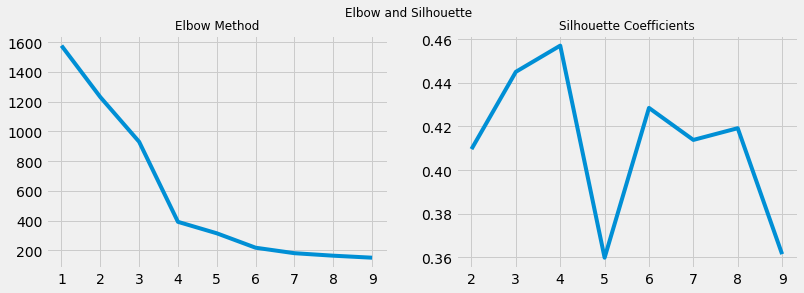

In [370]:
best_k(1,10,1,mca,10,100)


In [399]:
#inicia para evaluar el mejor k grafica de coeficiente de silueta
def coef_silueta(data_input,rango_final,num_subx,num_suby):

    X = data_input
    rango=rango_final
    
    from sklearn.metrics import silhouette_samples
    from matplotlib.ticker import FixedLocator, FixedFormatter

    
    kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                    for k in range(1, rango_final)]
    inertias = [model.inertia_ for model in kmeans_per_k]
    
    silhouette_scores = [silhouette_score(X, model.labels_)
                         for model in kmeans_per_k[1:]]
    
    
    plt.figure(figsize=(11, 15))
         
    num_silue = range(3,rango_final)
        
    for k in num_silue:
        plt.subplot(num_subx, num_suby, k - 2)
        
        y_pred = kmeans_per_k[k - 1].labels_
        silhouette_coefficients = silhouette_samples(X, y_pred)
    
        padding = len(X) // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()
            
    
            color = plt.cm.Spectral(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding
    
        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (3, 5):
            plt.ylabel("Cluster")
        
        if k in (5, 6):
            plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            #plt.xlabel("Silhouette Coefficient")
        else:
            plt.tick_params(labelbottom=False)
    
        plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
        plt.title("$k={}$".format(k), fontsize=16)
            
    plt.show()

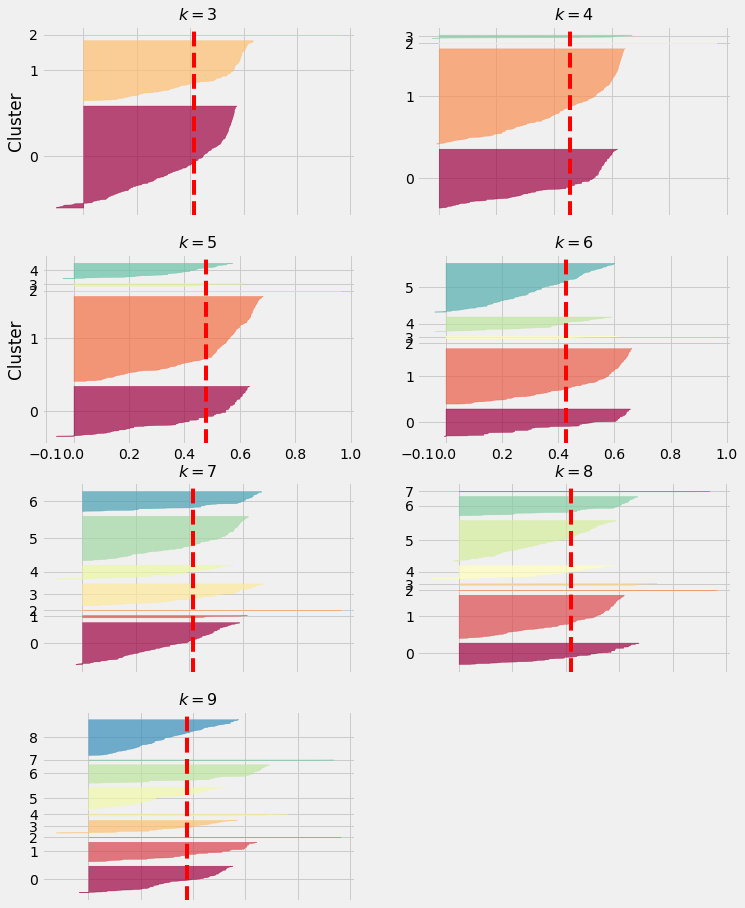

In [386]:
coef_silueta(mca,10,4,2)

In [387]:
def avg_silhouette(data_input,max_k,step_k):

    from sklearn.metrics import silhouette_samples
    X=data_input
    #max_k = 9 ## maximo número de clusters que vamos a crear
    K = range(1,max_k,step_k)
    
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        
        centers = pd.DataFrame(kmeanModel.cluster_centers_)
        labels = kmeanModel.labels_
        
        if 1<k<len(X):
                 
            silhouette_avg = silhouette_score(X, labels)
            print("* Para k = ",k, " el promedio de la silueta es de :",silhouette_avg)
            sample_silhouette_values = silhouette_samples(X, labels)

In [390]:
avg_silhouette(mca,10,1)

* Para k =  2  el promedio de la silueta es de : 0.9370538191310648
* Para k =  3  el promedio de la silueta es de : 0.4138760053064692
* Para k =  4  el promedio de la silueta es de : 0.45531579653103293
* Para k =  5  el promedio de la silueta es de : 0.4782294996217039
* Para k =  6  el promedio de la silueta es de : 0.4284161479537851
* Para k =  7  el promedio de la silueta es de : 0.4152506108264701
* Para k =  8  el promedio de la silueta es de : 0.41975295627552256
* Para k =  9  el promedio de la silueta es de : 0.37572599504329085
